<a id="index">Index</a>
1. [Importing libraries and data](#Importing-libraries-and-data)
2. [Cleaning and Feature Engineering](#Cleaning-and-Feature-Engineering)
    - [Monthly columns removal](#Monthly-columns-removal)
    - [Filling missing values](#Filling-missing-values)
    - [Termination Dates](#Termination-Dates)
    - [Age calculation](#Age-calculation)
    - [Current status](#Current-status)
    - [Is Promoted](#Is-Promoted)
    - [Dropping first 34 columns](#Dropping-first-34-columns)
    - [Final dataset](#Final-dataset)
3. [Analysis](#Analysis)
    - [Functions for annotation](#Functions-for-annotation)
    - [Utilization Status](#Utilization-Status)
    - [Feature Selection](#Feature-Selection)
    - [Normality Check](#Normality-Check)

## [Importing libraries and data](#index)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
Staff_utilization_2016_2017 = pd.read_excel(r"C:\Users\shash\OneDrive\Desktop\AscendPro\CapstoneProject\Data - working\staff utlz latest 16-17_masked.xlsx",names=['Employee No',
'Profit Center',
'Employee Name',
'Employee Position',
'Employee Location',
'People Group',
'Employee Category',
'Supervisor name',
'Join Date',
'Current Status',
'Month Year Termination Date',
'Apr 2016 Total Hours',
'Apr 2016 Total Available Hours',
'Apr 2016 Work Hours',
'Apr 2016 Leave Hours',
'Apr 2016 Training Hours',
'Apr 2016 BD Hours',
'Apr 2016 NC Hours',
'Apr 2016 Utilization%',
'May 2016 Total Hours',
'May 2016 Total Available Hours',
'May 2016 Work Hours',
'May 2016 Leave Hours',
'May 2016 Training Hours',
'May 2016 BD Hours',
'May 2016 NC Hours',
'May 2016 Utilization%',
'Jun 2016 Total Hours',
'Jun 2016 Total Available Hours',
'Jun 2016 Work Hours',
'Jun 2016 Leave Hours',
'Jun 2016 Training Hours',
'Jun 2016 BD Hours',
'Jun 2016 NC Hours',
'Jun 2016 Utilization%',
'Jul 2016 Total Hours',
'Jul 2016 Total Available Hours',
'Jul 2016 Work Hours',
'Jul 2016 Leave Hours',
'Jul 2016 Training Hours',
'Jul 2016 BD Hours',
'Jul 2016 NC Hours',
'Jul 2016 Utilization%',
'Aug 2016 Total Hours',
'Aug 2016 Total Available Hours',
'Aug 2016 Work Hours',
'Aug 2016 Leave Hours',
'Aug 2016 Training Hours',
'Aug 2016 BD Hours',
'Aug 2016 NC Hours',
'Aug 2016 Utilization%',
'Sep 2016 Total Hours',
'Sep 2016 Total Available Hours',
'Sep 2016 Work Hours',
'Sep 2016 Leave Hours',
'Sep 2016 Training Hours',
'Sep 2016 BD Hours',
'Sep 2016 NC Hours',
'Sep 2016 Utilization%',
'Oct 2016 Total Hours',
'Oct 2016 Total Available Hours',
'Oct 2016 Work Hours',
'Oct 2016 Leave Hours',
'Oct 2016 Training Hours',
'Oct 2016 BD Hours',
'Oct 2016 NC Hours',
'Oct 2016 Utilization%',
'Nov 2016 Total Hours',
'Nov 2016 Total Available Hours',
'Nov 2016 Work Hours',
'Nov 2016 Leave Hours',
'Nov 2016 Training Hours',
'Nov 2016 BD Hours',
'Nov 2016 NC Hours',
'Nov 2016 Utilization%',
'Dec 2016 Total Hours',
'Dec 2016 Total Available Hours',
'Dec 2016 Work Hours',
'Dec 2016 Leave Hours',
'Dec 2016 Training Hours',
'Dec 2016 BD Hours',
'Dec 2016 NC Hours',
'Dec 2016 Utilization%',
'Jan 2017 Total Hours',
'Jan 2017 Total Available Hours',
'Jan 2017 Work Hours',
'Jan 2017 Leave Hours',
'Jan 2017 Training Hours',
'Jan 2017 BD Hours',
'Jan 2017 NC Hours',
'Jan 2017 Utilization%',
'Feb 2017 Total Hours',
'Feb 2017 Total Available Hours',
'Feb 2017 Work Hours',
'Feb 2017 Leave Hours',
'Feb 2017 Training Hours',
'Feb 2017 BD Hours',
'Feb 2017 NC Hours',
'Feb 2017 Utilization%',
'Mar 2017 Total Hours',
'Mar 2017 Total Available Hours',
'Mar 2017 Work Hours',
'Mar 2017 Leave Hours',
'Mar 2017 Training Hours',
'Mar 2017 BD Hours',
'Mar 2017 NC Hours',
'Mar 2017 Utilization%',
'16_17 Total Hours',
'16_17 Total Available Hours',
'16_17 Work Hours',
'16_17 Leave Hours',
'16_17 Training Hours',
'16_17 BD Hours',
'16_17 NC Hours',
'16_17 Utilization%']
,header = None)

In [3]:
Staff_utilization_2017_2018 = pd.read_excel(r"C:\Users\shash\OneDrive\Desktop\AscendPro\CapstoneProject\Data - working\staff utlz latest 17-18_masked.xlsx",names = ['Employee No',
'Profit Center',
'Employee Name',
'Employee Position',
'Employee Location',
'People Group',
'Employee Category',
'Supervisor name',
'Join Date',
'Current Status',
'Month Year Termination Date',
'Apr 2017 Total Hours',
'Apr 2017 Total Available Hours',
'Apr 2017 Work Hours',
'Apr 2017 Leave Hours',
'Apr 2017 Training Hours',
'Apr 2017 BD Hours',
'Apr 2017 NC Hours',
'Apr 2017 Utilization%',
'May 2017 Total Hours',
'May 2017 Total Available Hours',
'May 2017 Work Hours',
'May 2017 Leave Hours',
'May 2017 Training Hours',
'May 2017 BD Hours',
'May 2017 NC Hours',
'May 2017 Utilization%',
'Jun 2017 Total Hours',
'Jun 2017 Total Available Hours',
'Jun 2017 Work Hours',
'Jun 2017 Leave Hours',
'Jun 2017 Training Hours',
'Jun 2017 BD Hours',
'Jun 2017 NC Hours',
'Jun 2017 Utilization%',
'Jul 2017 Total Hours',
'Jul 2017 Total Available Hours',
'Jul 2017 Work Hours',
'Jul 2017 Leave Hours',
'Jul 2017 Training Hours',
'Jul 2017 BD Hours',
'Jul 2017 NC Hours',
'Jul 2017 Utilization%',
'Aug 2017 Total Hours',
'Aug 2017 Total Available Hours',
'Aug 2017 Work Hours',
'Aug 2017 Leave Hours',
'Aug 2017 Training Hours',
'Aug 2017 BD Hours',
'Aug 2017 NC Hours',
'Aug 2017 Utilization%',
'Sep 2017 Total Hours',
'Sep 2017 Total Available Hours',
'Sep 2017 Work Hours',
'Sep 2017 Leave Hours',
'Sep 2017 Training Hours',
'Sep 2017 BD Hours',
'Sep 2017 NC Hours',
'Sep 2017 Utilization%',
'Oct 2017 Total Hours',
'Oct 2017 Total Available Hours',
'Oct 2017 Work Hours',
'Oct 2017 Leave Hours',
'Oct 2017 Training Hours',
'Oct 2017 BD Hours',
'Oct 2017 NC Hours',
'Oct 2017 Utilization%',
'Nov 2017 Total Hours',
'Nov 2017 Total Available Hours',
'Nov 2017 Work Hours',
'Nov 2017 Leave Hours',
'Nov 2017 Training Hours',
'Nov 2017 BD Hours',
'Nov 2017 NC Hours',
'Nov 2017 Utilization%',
'Dec 2017 Total Hours',
'Dec 2017 Total Available Hours',
'Dec 2017 Work Hours',
'Dec 2017 Leave Hours',
'Dec 2017 Training Hours',
'Dec 2017 BD Hours',
'Dec 2017 NC Hours',
'Dec 2017 Utilization%',
'Jan 2018 Total Hours',
'Jan 2018 Total Available Hours',
'Jan 2018 Work Hours',
'Jan 2018 Leave Hours',
'Jan 2018 Training Hours',
'Jan 2018 BD Hours',
'Jan 2018 NC Hours',
'Jan 2018 Utilization%',
'Feb 2018 Total Hours',
'Feb 2018 Total Available Hours',
'Feb 2018 Work Hours',
'Feb 2018 Leave Hours',
'Feb 2018 Training Hours',
'Feb 2018 BD Hours',
'Feb 2018 NC Hours',
'Feb 2018 Utilization%',
'Mar 2018 Total Hours',
'Mar 2018 Total Available Hours',
'Mar 2018 Work Hours',
'Mar 2018 Leave Hours',
'Mar 2018 Training Hours',
'Mar 2018 BD Hours',
'Mar 2018 NC Hours',
'Mar 2018 Utilization%',
'17_18 Total Hours',
'17_18 Total Available Hours',
'17_18 Work Hours',
'17_18 Leave Hours',
'17_18 Training Hours',
'17_18 BD Hours',
'17_18 NC Hours',
'17_18 Utilization%'],header = None)

In [4]:
# Removing first two rows of the data set.
Staff_utilization_2016_2017 = Staff_utilization_2016_2017.iloc[2:]
Staff_utilization_2017_2018 = Staff_utilization_2017_2018.iloc[2:]

In [5]:
#Resetting the index
Staff_utilization_2016_2017 = Staff_utilization_2016_2017.reset_index(drop=True)
Staff_utilization_2017_2018 = Staff_utilization_2017_2018.reset_index(drop=True)

In [6]:
Staff_utilization_2016_2017.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Month Year Termination Date,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30 00:00:00,Active,-,168,160,55,8,0,102,0,0.34375,176,168,32,8,0,168,8,0.190476,176,152,12,24,0,44,0,0.078947,168,134,69,32,2,153,24,0.514925,184,168,20,16,0,84,0,0.119048,176,116,65,28,32,123,0,0.560345,168,150,53,12,6,91,0,0.353333,176,152,37,24,0,59,0,0.243421,176,136,84,40,0,126,0,0.617647,176,144,68,8,24,67,0,0.472222,160,147,49,8,5,114,0,0.333333,184,175,92,8,1,61,24,0.525714,2088,1802,636,216,70,1192,56,0.352941
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31 00:00:00,Active,-,168,152,54,8,8,44,74,0.355263,176,152,24,24,0,65,67,0.157895,176,172,86,4,0,47,50,0.5,168,144,27,8,16,63,79,0.1875,184,168,34,16,0,68,70,0.202381,176,138,26,12,26,61,66.5,0.188406,168,160,11,8,0,87,66,0.06875,176,160,28,16,0,70,73,0.175,176,136,54,40,0,41,41,0.397059,176,164,29,12,0,67,70,0.176829,160,152,0,8,0,76,76,0,184,184,182.5,0,0,5,1.5,0.991848,2088,1882,555.5,156,50,694,734,0.295165
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31 00:00:00,Active,-,168,144,59,16,8,43,60,0.409722,176,184,52.5,-8,0,69.5,62,0.285326,176,168,43,8,0,61,64,0.255952,168,167,85,0,1,30.5,61.5,0.508982,184,160,119,24,0,34,34,0.74375,176,152,40.5,0,24,55.5,67,0.266447,168,152,62.5,8,8,43,40.5,0.411184,176,157.5,48,16,2.5,64,54.5,0.304762,176,136,124,40,0,8,16,0.911765,176,152,93.5,24,0,49,26.5,0.615132,160,152,57.5,8,0,52,49.5,0.378289,184,174,220,8,2,-2.5,14,1.264368,2088,

In [7]:
#Replacing all the - values with NAN as it will have effect on data types of column
Staff_utilization_2016_2017 = Staff_utilization_2016_2017.replace('-', np.NaN, regex = False)
Staff_utilization_2017_2018 = Staff_utilization_2017_2018.replace('-', np.NaN, regex = False)

In [8]:
# checking the data types.
Staff_utilization_2016_2017.dtypes

Employee No                               object
Profit Center                             object
Employee Name                             object
Employee Position                         object
Employee Location                         object
People Group                              object
Employee Category                         object
Supervisor name                           object
Join Date                         datetime64[ns]
Current Status                            object
Month Year Termination Date       datetime64[ns]
Apr 2016 Total Hours                     float64
Apr 2016 Total Available Hours           float64
Apr 2016 Work Hours                      float64
Apr 2016 Leave Hours                     float64
Apr 2016 Training Hours                  float64
Apr 2016 BD Hours                        float64
Apr 2016 NC Hours                        float64
Apr 2016 Utilization%                    float64
May 2016 Total Hours                     float64
May 2016 Total Avail

In [9]:
Staff_utilization_2017_2018.dtypes

Employee No                               object
Profit Center                             object
Employee Name                             object
Employee Position                         object
Employee Location                         object
People Group                              object
Employee Category                         object
Supervisor name                           object
Join Date                         datetime64[ns]
Current Status                            object
Month Year Termination Date       datetime64[ns]
Apr 2017 Total Hours                     float64
Apr 2017 Total Available Hours           float64
Apr 2017 Work Hours                      float64
Apr 2017 Leave Hours                     float64
Apr 2017 Training Hours                  float64
Apr 2017 BD Hours                        float64
Apr 2017 NC Hours                        float64
Apr 2017 Utilization%                    float64
May 2017 Total Hours                     float64
May 2017 Total Avail

In [10]:
Terminations_15_18 = pd.read_excel(r"C:\Users\shash\OneDrive\Desktop\AscendPro\CapstoneProject\Data - working\Terminations 15-18.xlsx")
Terminations_15_18.head()

,Employee Number,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,4,Barbee Joey,1975,M,Career Growth,kadoo,2018-02-27,NaN,NaN
1,8,Kakalina Lorry,1980,F,Career Growth,cynoid,2017-02-17,3.0,NaN
2,11,Aili Nessy,1982,M,Career Growth,NaN,2017-01-12,2.0,NaN
3,15,Peria Maryjo,1979,M,Career Growth,flimbo,2016-09-15,3.0,NaN
4,19,Cordey Sofia,1982,F,Employee Transfer,NaN,2018-04-26,NaN,NaN


In [11]:
Terminations_15_18.dtypes

Employee Number                      int64
Employee Name                       object
YEAR of Birth                        int64
Gender                              object
Leaving Reason                      object
Previous Employer                   object
Last Update Date            datetime64[ns]
Latest  Available Rating           float64
Emp Ref.                            object
dtype: object

In [12]:
Terminations_15_18 = Terminations_15_18.replace('-', np.NaN, regex = False)

In [13]:
# Changing the data type of Employee Number to match with the data type of Employee No of other datasets
Terminations_15_18['Employee Number'] = Terminations_15_18['Employee Number'].astype(object)

In [14]:
Terminations_15_18.dtypes

Employee Number                     object
Employee Name                       object
YEAR of Birth                        int64
Gender                              object
Leaving Reason                      object
Previous Employer                   object
Last Update Date            datetime64[ns]
Latest  Available Rating           float64
Emp Ref.                            object
dtype: object

In [15]:
Staff_utilization_2016_2017.dtypes

Employee No                               object
Profit Center                             object
Employee Name                             object
Employee Position                         object
Employee Location                         object
People Group                              object
Employee Category                         object
Supervisor name                           object
Join Date                         datetime64[ns]
Current Status                            object
Month Year Termination Date       datetime64[ns]
Apr 2016 Total Hours                     float64
Apr 2016 Total Available Hours           float64
Apr 2016 Work Hours                      float64
Apr 2016 Leave Hours                     float64
Apr 2016 Training Hours                  float64
Apr 2016 BD Hours                        float64
Apr 2016 NC Hours                        float64
Apr 2016 Utilization%                    float64
May 2016 Total Hours                     float64
May 2016 Total Avail

## [Cleaning and Feature Engineering](#index)

In [16]:
# Converting All the Date columns to datetime format
Staff_utilization_2016_2017['Month Year Termination Date'] = pd.to_datetime(Staff_utilization_2016_2017['Month Year Termination Date'])

Staff_utilization_2017_2018['Month Year Termination Date'] = pd.to_datetime(Staff_utilization_2017_2018['Month Year Termination Date'])



In [17]:
# Converting 17_18 Leave Hours to same format as in Staff_utilization_2016_2017
Staff_utilization_2017_2018['17_18 Leave Hours'] = Staff_utilization_2017_2018['17_18 Leave Hours'].astype(float)


In [18]:
# Merging two datasets should give in all 1111 employee names
# Merging the datasest on Employee No and Employee Name
# Staff_utilization_2016_2017["Employee No"] = Staff_utilization_2016_2017["Employee No"].astype(object)
Staff_utilization_2017_2018["Employee No"] = Staff_utilization_2017_2018["Employee No"].astype(object)
Staff_utilization_2016_2018 = pd.merge(left = Staff_utilization_2016_2017, right = Staff_utilization_2017_2018, left_on = ['Employee No', 'Employee Name'], right_on = ['Employee No', 'Employee Name'], how = 'outer', suffixes=('16_17','17_18') )

In [19]:
# Merging further with termination dataset on Employee Name

Staff_utilization_2016_2018 = pd.merge(Staff_utilization_2016_2018, Terminations_15_18[['Employee Number',
'Employee Name',
'YEAR of Birth',
'Gender',
'Leaving Reason',
'Previous Employer',
'Last Update Date',
'Latest  Available Rating',
'Emp Ref.']], left_on=['Employee Name'],right_on=['Employee Name'], how = 'left')

In [20]:
Staff_utilization_2016_2018.head()

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,Apr 2017 Total Hours,Apr 2017 Total Available Hours,Apr 2017 Work Hours,Apr 2017 Leave Hours,Apr 2017 Training Hours,Apr 2017 BD Hours,Apr 2017 NC Hours,Apr 2017 Utilization%,May 2017 Total Hours,May 2017 Total Available Hours,May 2017 Work Hours,May 2017 Leave Hours,May 2017 Training Hours,May 2017 BD Hours,May 2017 NC Hours,May 2017 Utilization%,Jun 2017 Total Hours,Jun 2017 Total Available Hours,Jun 2017 Work Hours,Jun 2017 Leave Hours,Jun 2017 Training Hours,Jun 2017 BD Hours,Jun 2017 NC Hours,Jun 2017 Utilization%,Jul 2017 Total Hours,Jul 2017 Total Available Hours,Jul 2017 Work Hours,Jul 2017 Leave Hours,Jul 2017 Training Hours,Jul 2017 BD Hours,Jul 2017 NC Hours,Jul 2017 Utilization%,Aug 2017 Total Hours,Aug 2017 Total Available Hours,Aug 2017 Work Hours,Aug 2017 Leave Hours,Aug 2017 Training Hours,Aug 2017 BD Hours,Aug 2017 NC Hours,Aug 2017 Utilization%,Sep 2017 Total Hours,Sep 2017 Total Available Hours,Sep 2017 Work Hours,Sep 2017 Leave Hours,Sep 2017 Training Hours,Sep 2017 BD Hours,Sep 2017 NC Hours,Sep 2017 Utilization%,Oct 2017 Total Hours,Oct 2017 Total Available Hours,Oct 2017 Work Hours,Oct 2017 Leave Hours,Oct 2017 Training Hours,Oct 2017 BD Hours,Oct 2017 NC Hours,Oct 2017 Utilization%,Nov 2017 Total Hours,Nov 2017 Total Available Hours,Nov 2017 Work Hours,Nov 2017 Leave Hours,Nov 2017 Train

In [21]:
Staff_utilization_2016_2018.shape

(1111, 236)

In [22]:
Staff_utilization_2016_2018['Current Status16_17'].value_counts()

Active        628
Resigned      141
New Joiner     15
Secondment      5
Name: Current Status16_17, dtype: int64

In [23]:
Staff_utilization_2016_2018['Current Status17_18'].value_counts()

Active        796
Resigned      145
New Joiner     24
Secondment      6
Sabbatical      2
Name: Current Status17_18, dtype: int64

In [24]:
# Converting all the values except resigned to Active.
Staff_utilization_2016_2018['Current Status16_17'].replace({"New Joiner" : "Active",
                                                           "Secondment" : "Active"}, inplace = True)

In [25]:
Staff_utilization_2016_2018['Current Status16_17'].value_counts()

Active      648
Resigned    141
Name: Current Status16_17, dtype: int64

In [26]:
Staff_utilization_2016_2018['Current Status17_18'].replace({"New Joiner" : "Active",
                                                           "Secondment" : "Active",
                                                           "Sabbatical" : "Active"}, inplace = True)

In [27]:
Staff_utilization_2016_2018['Current Status17_18'].value_counts()

Active      828
Resigned    145
Name: Current Status17_18, dtype: int64

In [28]:
Staff_utilization_2016_2018.isnull().sum()

Employee No                            0
Profit Center16_17                   322
Employee Name                          0
Employee Position16_17               322
Employee Location16_17               322
People Group16_17                    322
Employee Category16_17               322
Supervisor name16_17                 322
Join Date16_17                       322
Current Status16_17                  322
Month Year Termination Date16_17     970
Apr 2016 Total Hours                 522
Apr 2016 Total Available Hours       522
Apr 2016 Work Hours                  522
Apr 2016 Leave Hours                 522
Apr 2016 Training Hours              522
Apr 2016 BD Hours                    522
Apr 2016 NC Hours                    522
Apr 2016 Utilization%                526
May 2016 Total Hours                 506
May 2016 Total Available Hours       506
May 2016 Work Hours                  506
May 2016 Leave Hours                 506
May 2016 Training Hours              506
May 2016 BD Hour

### [Monthly columns removal](#index)

In [29]:
# removing all the monthly columns
df = Staff_utilization_2016_2018.drop(['Apr 2016 Total Hours',
'Apr 2016 Total Available Hours',
'Apr 2016 Work Hours',
'Apr 2016 Leave Hours',
'Apr 2016 Training Hours',
'Apr 2016 BD Hours',
'Apr 2016 NC Hours',
'Apr 2016 Utilization%',
'May 2016 Total Hours',
'May 2016 Total Available Hours',
'May 2016 Work Hours',
'May 2016 Leave Hours',
'May 2016 Training Hours',
'May 2016 BD Hours',
'May 2016 NC Hours',
'May 2016 Utilization%',
'Jun 2016 Total Hours',
'Jun 2016 Total Available Hours',
'Jun 2016 Work Hours',
'Jun 2016 Leave Hours',
'Jun 2016 Training Hours',
'Jun 2016 BD Hours',
'Jun 2016 NC Hours',
'Jun 2016 Utilization%',
'Jul 2016 Total Hours',
'Jul 2016 Total Available Hours',
'Jul 2016 Work Hours',
'Jul 2016 Leave Hours',
'Jul 2016 Training Hours',
'Jul 2016 BD Hours',
'Jul 2016 NC Hours',
'Jul 2016 Utilization%',
'Aug 2016 Total Hours',
'Aug 2016 Total Available Hours',
'Aug 2016 Work Hours',
'Aug 2016 Leave Hours',
'Aug 2016 Training Hours',
'Aug 2016 BD Hours',
'Aug 2016 NC Hours',
'Aug 2016 Utilization%',
'Sep 2016 Total Hours',
'Sep 2016 Total Available Hours',
'Sep 2016 Work Hours',
'Sep 2016 Leave Hours',
'Sep 2016 Training Hours',
'Sep 2016 BD Hours',
'Sep 2016 NC Hours',
'Sep 2016 Utilization%',
'Oct 2016 Total Hours',
'Oct 2016 Total Available Hours',
'Oct 2016 Work Hours',
'Oct 2016 Leave Hours',
'Oct 2016 Training Hours',
'Oct 2016 BD Hours',
'Oct 2016 NC Hours',
'Oct 2016 Utilization%',
'Nov 2016 Total Hours',
'Nov 2016 Total Available Hours',
'Nov 2016 Work Hours',
'Nov 2016 Leave Hours',
'Nov 2016 Training Hours',
'Nov 2016 BD Hours',
'Nov 2016 NC Hours',
'Nov 2016 Utilization%',
'Dec 2016 Total Hours',
'Dec 2016 Total Available Hours',
'Dec 2016 Work Hours',
'Dec 2016 Leave Hours',
'Dec 2016 Training Hours',
'Dec 2016 BD Hours',
'Dec 2016 NC Hours',
'Dec 2016 Utilization%',
'Jan 2017 Total Hours',
'Jan 2017 Total Available Hours',
'Jan 2017 Work Hours',
'Jan 2017 Leave Hours',
'Jan 2017 Training Hours',
'Jan 2017 BD Hours',
'Jan 2017 NC Hours',
'Jan 2017 Utilization%',
'Feb 2017 Total Hours',
'Feb 2017 Total Available Hours',
'Feb 2017 Work Hours',
'Feb 2017 Leave Hours',
'Feb 2017 Training Hours',
'Feb 2017 BD Hours',
'Feb 2017 NC Hours',
'Feb 2017 Utilization%',
'Mar 2017 Total Hours',
'Mar 2017 Total Available Hours',
'Mar 2017 Work Hours',
'Mar 2017 Leave Hours',
'Mar 2017 Training Hours',
'Mar 2017 BD Hours',
'Mar 2017 NC Hours',
'Mar 2017 Utilization%',
'Apr 2017 Total Hours',
'Apr 2017 Total Available Hours',
'Apr 2017 Work Hours',
'Apr 2017 Leave Hours',
'Apr 2017 Training Hours',
'Apr 2017 BD Hours',
'Apr 2017 NC Hours',
'Apr 2017 Utilization%',
'May 2017 Total Hours',
'May 2017 Total Available Hours',
'May 2017 Work Hours',
'May 2017 Leave Hours',
'May 2017 Training Hours',
'May 2017 BD Hours',
'May 2017 NC Hours',
'May 2017 Utilization%',
'Jun 2017 Total Hours',
'Jun 2017 Total Available Hours',
'Jun 2017 Work Hours',
'Jun 2017 Leave Hours',
'Jun 2017 Training Hours',
'Jun 2017 BD Hours',
'Jun 2017 NC Hours',
'Jun 2017 Utilization%',
'Jul 2017 Total Hours',
'Jul 2017 Total Available Hours',
'Jul 2017 Work Hours',
'Jul 2017 Leave Hours',
'Jul 2017 Training Hours',
'Jul 2017 BD Hours',
'Jul 2017 NC Hours',
'Jul 2017 Utilization%',
'Aug 2017 Total Hours',
'Aug 2017 Total Available Hours',
'Aug 2017 Work Hours',
'Aug 2017 Leave Hours',
'Aug 2017 Training Hours',
'Aug 2017 BD Hours',
'Aug 2017 NC Hours',
'Aug 2017 Utilization%',
'Sep 2017 Total Hours',
'Sep 2017 Total Available Hours',
'Sep 2017 Work Hours',
'Sep 2017 Leave Hours',
'Sep 2017 Training Hours',
'Sep 2017 BD Hours',
'Sep 2017 NC Hours',
'Sep 2017 Utilization%',
'Oct 2017 Total Hours',
'Oct 2017 Total Available Hours',
'Oct 2017 Work Hours',
'Oct 2017 Leave Hours',
'Oct 2017 Training Hours',
'Oct 2017 BD Hours',
'Oct 2017 NC Hours',
'Oct 2017 Utilization%',
'Nov 2017 Total Hours',
'Nov 2017 Total Available Hours',
'Nov 2017 Work Hours',
'Nov 2017 Leave Hours',
'Nov 2017 Training Hours',
'Nov 2017 BD Hours',
'Nov 2017 NC Hours',
'Nov 2017 Utilization%',
'Dec 2017 Total Hours',
'Dec 2017 Total Available Hours',
'Dec 2017 Work Hours',
'Dec 2017 Leave Hours',
'Dec 2017 Training Hours',
'Dec 2017 BD Hours',
'Dec 2017 NC Hours',
'Dec 2017 Utilization%',
'Jan 2018 Total Hours',
'Jan 2018 Total Available Hours',
'Jan 2018 Work Hours',
'Jan 2018 Leave Hours',
'Jan 2018 Training Hours',
'Jan 2018 BD Hours',
'Jan 2018 NC Hours',
'Jan 2018 Utilization%',
'Feb 2018 Total Hours',
'Feb 2018 Total Available Hours',
'Feb 2018 Work Hours',
'Feb 2018 Leave Hours',
'Feb 2018 Training Hours',
'Feb 2018 BD Hours',
'Feb 2018 NC Hours',
'Feb 2018 Utilization%',
'Mar 2018 Total Hours',
'Mar 2018 Total Available Hours',
'Mar 2018 Work Hours',
'Mar 2018 Leave Hours',
'Mar 2018 Training Hours',
'Mar 2018 BD Hours',
'Mar 2018 NC Hours',
'Mar 2018 Utilization%'], axis = 1)

### [Filling missing values](#index)

In [30]:
# Removing Emp Ref as it almost empty
df.drop('Emp Ref.', axis =1, inplace = True)

In [31]:
df[['Profit Center16_17',                  
'Employee Name',                          
'Employee Position16_17',               
'Employee Location16_17',               
'People Group16_17',                    
'Employee Category16_17',               
'Supervisor name16_17','Current Status16_17']] = df[['Profit Center16_17',                  
'Employee Name',                          
'Employee Position16_17',               
'Employee Location16_17',               
'People Group16_17',                    
'Employee Category16_17',               
'Supervisor name16_17','Current Status16_17']].fillna("Unknown")


In [32]:
df.head()

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,17_18 Total Hours,17_18 Total Available Hours,17_18 Work Hours,17_18 Leave Hours,17_18 Training Hours,17_18 BD Hours,17_18 NC Hours,17_18 Utilization%,Employee Number,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,NaT,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,PC - 1,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,NaT,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,NaT,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,NaT,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,PC - 3,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,4,1975.0,M,Career Growth,kadoo,2018-02-27,NaN
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,NaT,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [33]:
df[['16_17 Total Hours',                   
'16_17 Total Available Hours',         
'16_17 Work Hours',                    
'16_17 Leave Hours',                   
'16_17 Training Hours',                
'16_17 BD Hours',                     
'16_17 NC Hours',                      
'16_17 Utilization%',     
'17_18 Total Hours',                  
'17_18 Total Available Hours',         
'17_18 Work Hours',                    
'17_18 Leave Hours',                   
'17_18 Training Hours',                
'17_18 BD Hours',                      
'17_18 NC Hours',                      
'17_18 Utilization%']] = df[['16_17 Total Hours',                   
'16_17 Total Available Hours',         
'16_17 Work Hours',                    
'16_17 Leave Hours',                   
'16_17 Training Hours',                
'16_17 BD Hours',                     
'16_17 NC Hours',                      
'16_17 Utilization%',     
'17_18 Total Hours',                  
'17_18 Total Available Hours',         
'17_18 Work Hours',                    
'17_18 Leave Hours',                   
'17_18 Training Hours',                
'17_18 BD Hours',                      
'17_18 NC Hours',                      
'17_18 Utilization%']].fillna(0)

In [34]:
# Filling null values of date column with 1/1/1900
df[['Join Date16_17','Month Year Termination Date16_17','Join Date17_18', 'Month Year Termination Date17_18','Last Update Date']] = \
df[['Join Date16_17','Month Year Termination Date16_17','Join Date17_18', 'Month Year Termination Date17_18','Last Update Date']].fillna('1/1/1900')

In [35]:
# Removing Employee Number column as we already have Employee No column
df.drop('Employee Number', inplace=True,axis=1)

In [36]:
df.head()

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,17_18 Total Hours,17_18 Total Available Hours,17_18 Work Hours,17_18 Leave Hours,17_18 Training Hours,17_18 BD Hours,17_18 NC Hours,17_18 Utilization%,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,1900-01-01,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,PC - 1,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,1900-01-01,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,NaN,NaN,NaN,NaN,1900-01-01,NaN
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,1900-01-01,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,1900-01-01,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,NaN,NaN,NaN,NaN,1900-01-01,NaN
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,1900-01-01,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,1900-01-01,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,NaN,NaN,NaN,NaN,1900-01-01,NaN
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,1900-01-01,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,PC - 3,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,1975.0,M,Career Growth,kadoo,2018-02-27,NaN
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,1900-01-01,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,NaN,1900-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,1900-01-01,NaN


In [37]:
# Replacing null values of all the categorical columns with Unknown

df[['Profit Center17_18',                                           
'Employee Position17_18',               
'Employee Location17_18',               
'People Group17_18',                    
'Employee Category17_18',               
'Supervisor name17_18','Current Status17_18']] = df[['Profit Center17_18',                  
'Employee Position17_18',               
'Employee Location17_18',               
'People Group17_18',                    
'Employee Category17_18',               
'Supervisor name17_18','Current Status17_18']].fillna("Unknown")
df[['Gender',                              
'Leaving Reason',                      
'Previous Employer',
'Latest  Available Rating']] = df[['Gender',                              
'Leaving Reason',                      
'Previous Employer',
'Latest  Available Rating']].fillna("Unknown")

In [38]:
df['YEAR of Birth'] = df['YEAR of Birth'].fillna(0)

In [39]:
# Changing the Latest rating column to Object type
df['Latest  Available Rating'] = df['Latest  Available Rating'].astype(object)

In [40]:
df.isnull().sum()

Employee No                         0
Profit Center16_17                  0
Employee Name                       0
Employee Position16_17              0
Employee Location16_17              0
People Group16_17                   0
Employee Category16_17              0
Supervisor name16_17                0
Join Date16_17                      0
Current Status16_17                 0
Month Year Termination Date16_17    0
16_17 Total Hours                   0
16_17 Total Available Hours         0
16_17 Work Hours                    0
16_17 Leave Hours                   0
16_17 Training Hours                0
16_17 BD Hours                      0
16_17 NC Hours                      0
16_17 Utilization%                  0
Profit Center17_18                  0
Employee Position17_18              0
Employee Location17_18              0
People Group17_18                   0
Employee Category17_18              0
Supervisor name17_18                0
Join Date17_18                      0
Current Stat

In [41]:
df.loc[df['Profit Center17_18'] == 'Unknown', 'Profit Center17_18'] = df['Profit Center16_17']

In [42]:
df['Profit Center'] = df['Profit Center17_18']

In [43]:
df.loc[df['Employee Location17_18'] == 'Unknown', 'Employee Location17_18'] = df['Employee Location16_17']
df['Employee Location'] = df['Employee Location17_18']

In [44]:
df.loc[df['People Group17_18'] == 'Unknown', 'People Group17_18'] = df['People Group16_17']
df['People Group'] = df['People Group17_18']

In [45]:
df.loc[df['Employee Category17_18'] == 'Unknown', 'Employee Category17_18'] = df['Employee Category16_17']
df['Employee Category'] = df['Employee Category17_18']

In [46]:
df.loc[df['Supervisor name17_18'] == 'Unknown', 'Supervisor name17_18'] = df['Supervisor name16_17']
df['Supervisor name'] = df['Supervisor name17_18']

In [47]:
df.head()

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,17_18 Total Hours,17_18 Total Available Hours,17_18 Work Hours,17_18 Leave Hours,17_18 Training Hours,17_18 BD Hours,17_18 NC Hours,17_18 Utilization%,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name
0,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,1900-01-01,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,PC - 1,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,1900-01-01,2080.0,1864.5,448.0,188.0,27.5,1431.5,18.0,0.240279,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,1900-01-01,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,1900-01-01,2080.0,1868.0,722.0,208.0,4.0,600.5,596.5,0.386510,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,1900-01-01,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,PC - 2,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,1900-01-01,2080.0,1720.0,1173.0,338.0,22.0,463.5,357.5,0.681977,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,1900-01-01,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,PC - 3,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,1840.0,1640.5,273.0,196.0,3.5,1361.0,24.0,0.166413,1975.0,M,Career Growth,kadoo,2018-02-27,Unknown,PC - 3,Location 1,Client Service Staff,Resigned,Idalina Lauraine
4,5,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,1900-01-01,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,PC - 4,Unknown,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1900-01-01,Unknown,1900-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 4,Location 3,Client Service Staff,Level 1/2,Abagail Druci


### [Termination Dates](#index)

In [48]:
# Current status of employee No mentioned below is blank but they have stopped working in 1st financial year so replacing the values with Resigned and giving thenm termination date based on ther last working month.

# df.loc[df['Employee No'] == '5', 'Current Status16_17'] = "Resigned"
df.loc[df['Employee No'] == '96', 'Current Status16_17'] = "Resigned"
df.loc[df['Employee No'] == '213', 'Current Status16_17'] = "Resigned"
df.loc[df['Employee No'] == '248', 'Current Status16_17'] = "Resigned"
df.loc[df['Employee No'] == '433', 'Current Status16_17'] = "Resigned"

In [49]:
# df.loc[df['Employee No'] == '5', 'Month Year Termination Date16_17'] = "2016-12-31"
df.loc[df['Employee No'] == '96', 'Month Year Termination Date16_17'] = "2016-10-31"
df.loc[df['Employee No'] == '213', 'Month Year Termination Date16_17'] = "2016-07-30"
df.loc[df['Employee No'] == '248', 'Month Year Termination Date16_17'] = "2016-12-31"
df.loc[df['Employee No'] == '433', 'Month Year Termination Date16_17'] = "2016-04-30"

In [50]:
df['Current Status16_17'].value_counts()

Active      644
Unknown     322
Resigned    145
Name: Current Status16_17, dtype: int64

In [51]:
df['Current Status17_18'].value_counts()

Active      828
Resigned    145
Unknown     138
Name: Current Status17_18, dtype: int64

In [52]:
# taking out year and month from Month Year Termination Date columns for both the years
df['Year of termination16_17']  = pd.DatetimeIndex(df['Month Year Termination Date16_17']).year
df['Month of termination16_17']  = pd.DatetimeIndex(df['Month Year Termination Date16_17']).month

In [53]:
df['Year of termination17_18']  = pd.DatetimeIndex(df['Month Year Termination Date17_18']).year
df['Month of termination17_18']  = pd.DatetimeIndex(df['Month Year Termination Date17_18']).month

In [54]:
# Creating Month of termination column from the two month columns extracted above.

df.loc[df['Month Year Termination Date16_17']=='1900-01-01', 'Month of termination16_17'] = 0
df.loc[df['Month Year Termination Date17_18']=='1900-01-01', 'Month of termination17_18'] = 0
df['Month of termination'] = df['Month of termination16_17'] + df['Month of termination17_18']
df.loc[df['Month of termination']==0, 'Month of termination'] = 'Unknown'
df['Month of termination'] = df['Month of termination'].astype(object)

In [55]:
# Replacing the date 1/1/1900 with in both the Termination columns with Last date of Financial year
df.loc[df['Current Status16_17']=='Active', 'Month Year Termination Date16_17'] = '2017-03-31'
df.loc[df['Current Status17_18']=='Active', 'Month Year Termination Date17_18'] = '2018-03-31'

# Calculating Tenure of each employee in company till 2018
df['Tenure_till_16_17'] = df['Month Year Termination Date16_17'] - df['Join Date16_17']
df['Tenure_till_16_17'] = df['Tenure_till_16_17']/np.timedelta64(1,'Y')

df['Tenure_till_17_18'] = df['Month Year Termination Date17_18'] - df['Join Date17_18']
df['Tenure_till_17_18'] = df['Tenure_till_17_18']/np.timedelta64(1,'Y')

#Creating a merged new column from two columns created above
df['Tenure_till_18'] = np.where(df['Tenure_till_17_18']>df['Tenure_till_16_17'],df['Tenure_till_17_18'],df['Tenure_till_16_17'])
df['Tenure_till_18_in_months'] = df['Tenure_till_18']*12
df['Tenure_till_18_in_years']  = df['Tenure_till_18'].round(2)

### [Age calculation](#index)

In [56]:
# Caluclating age of employees who resigned using the Year column created in above stage and Year of Birth
df['Age_16_17'] = df['Year of termination16_17'] - df['YEAR of Birth']
df['Age_17_18'] = df['Year of termination17_18'] - df['YEAR of Birth']

df.loc[df['Age_16_17']==1900, 'Age_16_17'] = 0
df.loc[df['Age_16_17']<0, 'Age_16_17'] = 0
df.loc[df['Age_17_18']==1900, 'Age_17_18'] = 0
df.loc[df['Age_17_18']<0, 'Age_17_18'] = 0

# Creating age column for all the employees who resigned from 2016 to 2018
df['Age_16_18'] = df['Age_16_17'] + df['Age_17_18']

# Replacing  odd values in final age columns with 0
df.loc[df['Age_16_18']==2016, 'Age_16_18'] = 0
df.loc[df['Age_16_18']==2017, 'Age_16_18'] = 0

# dividing age value by two whereever the termination column have same termination date.
df.loc[df['Age_16_18']>=48, 'Age_16_18'] = df['Age_16_18']/2


In [57]:
df['Age_16_18'].value_counts()

0.0     835
28.0     42
26.0     26
27.0     24
25.0     21
30.0     21
29.0     21
24.0     21
22.0     15
31.0     14
34.0     13
32.0     12
23.0     10
33.0      9
21.0      6
37.0      6
35.0      5
36.0      3
40.0      2
43.0      2
39.0      2
38.0      1
Name: Age_16_18, dtype: int64

### [Current status](#index)

In [58]:
df.shape

(1111, 60)

In [59]:
len(df["Employee Name"].unique()), len(df["Employee No"].unique())

(1106, 1111)

In [60]:
# Combining the columns 'Current Status16_17'&'Current Status17_18'
supervisors17_18 = Staff_utilization_2017_2018["Supervisor name"].unique()
def conditions(row):
    
    if (row['Current Status16_17'] == 'Resigned' and row['Current Status17_18'] == 'Resigned'):
        return 'Resigned'
    elif (row['Current Status16_17'] == 'Active' and row['Current Status17_18'] == 'Active'):
        return 'Active'
    elif (row['Current Status16_17'] == 'Resigned' and row['Current Status17_18'] == 'Active'):
        return 'Resigned'
    elif (row['Current Status16_17'] == 'Active' and row['Current Status17_18'] == 'Resigned'):
        return 'Resigned'
    elif (row['Current Status16_17'] == 'Resigned' and row['Current Status17_18'] == 'Unknown'):
        return 'Resigned'
    elif (row['Current Status16_17'] == 'Unknown' and row['Current Status17_18'] == 'Resigned'):
        return 'Resigned'
    elif (row['Current Status16_17'] == 'Active' and row['Current Status17_18'] == 'Unknown'):
        if row["Employee Name"] in supervisors17_18:
            return 'Active'
        else:
            return 'Resigned'
    elif (row['Current Status16_17'] == 'Unknown' and row['Current Status17_18'] == 'Active'):
        return 'Active'
    elif (row['Current Status16_17'] == 'Unknown' and row['Current Status17_18'] == 'Unknown'):
        return 'Resigned'

    
df['Current Status16_18'] = df.apply(conditions, axis =1)

In [61]:
Staff_utilization_2016_2017["Current Status"].isnull().sum()

0

In [62]:
Staff_utilization_2017_2018["Current Status"].isnull().sum()

0

In [63]:
df['Current Status16_17'].value_counts()

Active      644
Unknown     322
Resigned    145
Name: Current Status16_17, dtype: int64

In [64]:
df['Current Status17_18'].value_counts()

Active      828
Resigned    145
Unknown     138
Name: Current Status17_18, dtype: int64

In [65]:
df['Current Status16_18'].value_counts()

Active      829
Resigned    282
Name: Current Status16_18, dtype: int64

### [Is Promoted](#index)

In [66]:
# Mapping all the values of 'Employee Position16_17' & 'Employee Position16_17'
df['Employee Position16_17'] = df['Employee Position16_17'].map({"Level 1":1,
"Level 2":2,
"Level 3":3,
"Level 4":4,
"Level 5":5,
"Level 6":6,
"Level 7":7,
"Level 8":8,
"Level 10":10,
"Level A1":11,
"Level A2":12,
"Level A3":13,
"Unknown":0})

df['Employee Position17_18'] = df['Employee Position17_18'].map({"Level 1":1,
"Level 2":2,
"Level 3":3,
"Level 4":4,
"Level 5":5,
"Level 6":6,
"Level 7":7,
"Level 8":8,
"Level A1":11,
"Level A2":12,
"Level A3":13,
"Unknown":20})

# Creating a column 'Is promoted' based on employee positions in both the years
df['Is promoted'] = np.where(df['Employee Position16_17']>df['Employee Position17_18'], "Yes", "No")

In [67]:
df["Is promoted"].value_counts()

No     949
Yes    162
Name: Is promoted, dtype: int64

In [68]:
df[(df["Is promoted"]=="Yes") & (df["Current Status16_18"]=="Resigned")]

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,17_18 Total Hours,17_18 Total Available Hours,17_18 Work Hours,17_18 Leave Hours,17_18 Training Hours,17_18 BD Hours,17_18 NC Hours,17_18 Utilization%,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Year of termination16_17,Month of termination16_17,Year of termination17_18,Month of termination17_18,Month of termination,Tenure_till_16_17,Tenure_till_17_18,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_17,Age_17_18,Age_16_18,Current Status16_18,Is promoted


In [69]:
df['16_17 Utilization%'] = df['16_17 Utilization%']*100
df['17_18 Utilization%'] = df['17_18 Utilization%']*100

In [70]:
df['Total Hours'] = df['16_17 Total Hours'] + df['17_18 Total Hours']
df['Total Available Hours'] = df['16_17 Total Available Hours'] + df['17_18 Total Available Hours']
df['Work Hours'] = df['16_17 Work Hours'] + df['17_18 Work Hours']
df['Leave Hours'] = df['16_17 Leave Hours'] +df['17_18 Leave Hours']
df['Training Hours'] =df['16_17 Training Hours'] + df['17_18 Training Hours']
df['BD Hours'] = df['16_17 BD Hours'] + df['17_18 BD Hours']
df['NC Hours'] = df['16_17 NC Hours'] +df['17_18 NC Hours']

In [71]:
def conditions_utilization(df):
    if (df['16_17 Utilization%'] != 0 and df['17_18 Utilization%'] != 0):
        return (df['16_17 Utilization%'] + df['17_18 Utilization%'])/2
    elif (df['16_17 Utilization%'] == 0 and df['17_18 Utilization%'] != 0):
        return df['17_18 Utilization%']
    elif (df['16_17 Utilization%'] != 0 and df['17_18 Utilization%'] == 0):
        return df['16_17 Utilization%']
    else:
        return df['16_17 Utilization%']
    
df['Utilization%'] = df.apply(conditions_utilization, axis =1)

In [72]:
df[df["Utilization%"].isnull()]

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,17_18 Total Hours,17_18 Total Available Hours,17_18 Work Hours,17_18 Leave Hours,17_18 Training Hours,17_18 BD Hours,17_18 NC Hours,17_18 Utilization%,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Year of termination16_17,Month of termination16_17,Year of termination17_18,Month of termination17_18,Month of termination,Tenure_till_16_17,Tenure_till_17_18,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_17,Age_17_18,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%


In [73]:
df['Utilization%'].describe()

count    1111.000000
mean       71.954932
std        33.961676
min         0.000000
25%        55.588700
50%        81.395349
75%        93.720940
max       600.000000
Name: Utilization%, dtype: float64

In [74]:
df['16_17 Utilization%'].describe()

count    1111.000000
mean       49.561412
std        44.083191
min         0.000000
25%         0.000000
50%        56.626506
75%        87.952566
max       600.000000
Name: 16_17 Utilization%, dtype: float64

In [75]:
df['17_18 Utilization%'].describe()

count    1111.000000
mean       64.259402
std        39.155447
min        -4.918033
25%        28.083960
50%        81.318681
75%        95.291082
max       225.000000
Name: 17_18 Utilization%, dtype: float64

### [Dropping first 34 columns](#index)

In [76]:
first_column = df.pop('Employee No')
df.insert(35, 'Employee No', first_column)

first_column = df.pop('Employee Name')
df.insert(35, 'Employee Name', first_column)

In [77]:
df = df.iloc[:,34:]

In [78]:
df.head()

,Employee No,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Year of termination16_17,Month of termination16_17,Year of termination17_18,Month of termination17_18,Month of termination,Tenure_till_16_17,Tenure_till_17_18,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_17,Age_17_18,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,Rochette Jilleen,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,1900,0,1900,0,Unknown,16.498628,17.497964,17.497964,209.975564,17.50,0.0,0.0,0.0,Active,Yes,4168.0,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.661004
1,2,Daryl Natalina,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1900,0,1900,0,Unknown,17.834726,18.834062,18.834062,226.008748,18.83,0.0,0.0,0.0,Active,No,4168.0,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.083718
2,3,Annnora Gabrielle,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1900,0,1900,0,Unknown,16.161865,17.161201,17.161201,205.934413,17.16,0.0,0.0,0.0,Active,No,4168.0,3618.5,2177.5,482.0,67.5,970.5,907.0,60.553933
3,4,Barbee Joey,1975.0,M,Career Growth,kadoo,2018-02-27,Unknown,PC - 3,Location 1,Client Service Staff,Resigned,Idalina Lauraine,1900,0,2018,2,2,16.498628,17.413089,17.413089,208.957063,17.41,0.0,43.0,43.0,Resigned,No,3928.0,3491.5,546.0,404.0,32.5,2743.0,279.0,15.695026
4,5,Idalina Lauraine,0.0,Unknown,Unknown,Unknown,1900-01-01,Unknown,PC - 4,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1900,0,1900,0,Unknown,18.751925,0.000000,18.751925,225.023101,18.75,0.0,0.0,0.0,Active,No,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,12.365145


In [79]:
df.drop(['Last Update Date','YEAR of Birth','Year of termination16_17','Month of termination16_17','Year of termination17_18','Month of termination17_18','Age_16_17','Age_17_18','Tenure_till_16_17','Tenure_till_17_18'], axis = 1, inplace = True)

In [80]:
df["Gender"].value_counts()

Unknown    814
M          201
F           96
Name: Gender, dtype: int64

### [Final dataset](#index)

In [81]:
Final_dataset = df.copy()

In [82]:
Final_dataset.shape

(1111, 26)

In [83]:
Final_dataset["Is promoted"].value_counts()

No     949
Yes    162
Name: Is promoted, dtype: int64

In [84]:
Final_dataset.head(2)

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,Rochette Jilleen,Unknown,Unknown,Unknown,Unknown,PC - 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Unknown,17.497964,209.975564,17.50,0.0,Active,Yes,4168.0,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.661004
1,2,Daryl Natalina,Unknown,Unknown,Unknown,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Unknown,18.834062,226.008748,18.83,0.0,Active,No,4168.0,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.083718


## [Analysis](#index)

### [Functions for annotation](#index)

[Help on ax_f object](https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9)

[link](https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib) for the function source

In [85]:
cmaps = ['Accent',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'Dark2',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'Paired',
 'Pastel1',
 'Pastel2',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Set1',
 'Set2',
 'Set3',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cividis',
 'cool',
 'coolwarm',
 'copper',
 'crest',
 'cubehelix',
 'flag',
 'flare',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'icefire',
 'inferno',
 'jet',
 'magma',
 'mako',
 'nipy_spectral',
 'ocean',
 'pink',
 'plasma',
 'prism',
 'rainbow',
 'rocket',
 'seismic',
 'spring',
 'summer',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'terrain',
 'turbo',
 'twilight',
 'twilight_shifted',
 'viridis',
 'vlag',
 'winter']

In [86]:
cmap = sns.color_palette("cool", as_cmap=True)

In [87]:
Final_dataset_resigned = Final_dataset.loc[Final_dataset['Current Status16_18']=="Resigned"]
Final_dataset_active = Final_dataset.loc[Final_dataset['Current Status16_18']!="Resigned"]

In [88]:
### For horizontal bar charts
def annotateHPlots(ax_f, percent_series = None, clearance = 0.005, ticksize = 16, annotsize = 12):
    """
    ax_f           : it is the object that is returned from any plot command
    percent_series : the series returned when the member function value_counts(normalize=True) is applied on a 
                     dataframe column
    clearance      : used to specify the distance between the annotation and the tip of the bar
    """
    width_only = False
    if percent_series is None:
        width_only = True

    for cat, p in zip(ax_f.get_yticklabels(), ax_f.patches):
        width = p.get_width()
        height = p.get_height()

        x, y = p.get_xy()
        if width_only:
            ax_f.annotate(f'{width}', (x + width + clearance, y + height/2), va='center', size=annotsize)
        else:
            ax_f.annotate(f'{percent_series[cat.get_text()]*100:.2f}%', (x + width + clearance, y + height/2), va='center', size = annotsize)

    ax_f.tick_params(axis='both', which='major', labelsize = ticksize)
    ax_f.xaxis.label.set_fontsize(ticksize)
    ax_f.yaxis.label.set_fontsize(ticksize)
    ax_f.set_axisbelow(True)
    plt.grid()
    return ax_f
def adjustHPlot(ax_f):
    texts = [ch for ch in ax_f.get_children() if type(ch)==matplotlib.text.Annotation]
    maxText = max(texts, key=lambda a: a.properties()["position"][0])
    
    renderr = ax_f.figure.canvas.get_renderer()
    textMaxExtent = maxText.get_window_extent(renderr).inverse_transformed(ax_f.transData).width + maxText.xy[0]
    overlap = textMaxExtent - ax_f.viewLim.xmax

    if overlap > 0:
        ax_f.set_xlim(ax_f.viewLim.xmin, ax_f.viewLim.xmax + overlap)

In [91]:
### For vertical bar charts
def annotateVPlots(ax_f, percent_series = None, clearance = 5, ticksize = 16, annotsize = 12):
    """
    ax_f           : it is the object that is returned from any plot command
    percent_series : the series returned when the member function value_counts(normalize=True) is applied on a
                     dataframe column
    clearance      : used to specify the distance between the annotation and the tip of the bar
    """
    height_only = False
    if percent_series is None:
        height_only = True
    
    bin_names = ax_f.get_xticklabels()
    patches   = ax_f.patches
        
    
    for cat, p in zip(bin_names, patches):
        width = p.get_width()
        height = p.get_height()

        x, y = p.get_xy()
        if height_only:
            ax_f.annotate(f'{height}', (x + width/2, y + height + clearance), ha='center', size=annotsize)
        else:
            ax_f.annotate(f'{height} ({percent_series[cat.get_text()]:.2f}%)', (x + width/2, y + height + clearance), ha='center', size=annotsize)

    ax_f.tick_params(axis='both', which='major', labelsize = ticksize)
    ax_f.xaxis.label.set_fontsize(ticksize)
    ax_f.yaxis.label.set_fontsize(ticksize)
    ax_f.set_axisbelow(True)
    plt.grid()
    return ax_f


def adjustVPlot(ax_f):
    texts = [ch for ch in ax_f.get_children() if type(ch)==matplotlib.text.Annotation]
    maxText = max(texts, key=lambda a: a.properties()["position"][1])
    
    renderr = ax_f.figure.canvas.get_renderer()
    textMaxExtent = maxText.get_window_extent(renderr).inverse_transformed(ax_f.transData).height + maxText.xy[1]
#     print(textMaxExtent)
#     overlap = textMaxExtent - ax_f.viewLim.ymax
#     if overlap > 0:
#     ax_f.set_ylim(ax_f.viewLim.ymin, ax_f.viewLim.ymax + overlap)
#     print(max(ax_f.viewLim.ymax, textMaxExtent))
    ax_f.set_ylim(ax_f.viewLim.ymin, max(ax_f.viewLim.ymax, textMaxExtent))
#     print(ax_f.viewLim)
#     print(maxText.get_window_extent(renderr).inverse_transformed(ax_f.transData).height + maxText.xy[1])

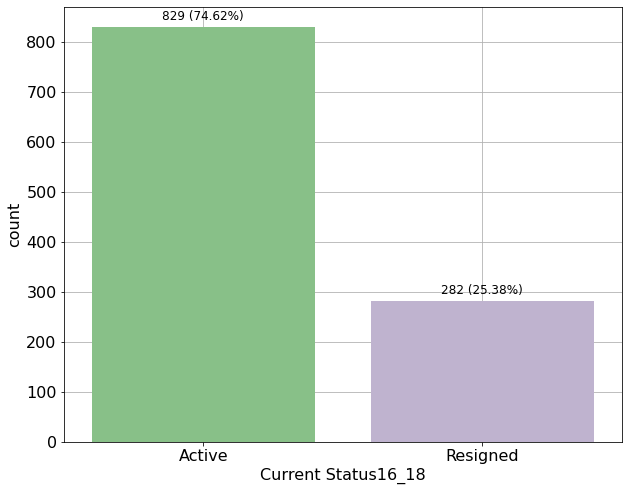

In [92]:
# Analyzing target column
plt.figure(figsize=(10,8))
ax = sns.countplot(Final_dataset['Current Status16_18'], palette=sns.color_palette("Accent"))
percents = Final_dataset['Current Status16_18'].value_counts(normalize = True)*100
ax = annotateVPlots(ax, percents, clearance=15, ticksize=16, annotsize=12)
adjustVPlot(ax)

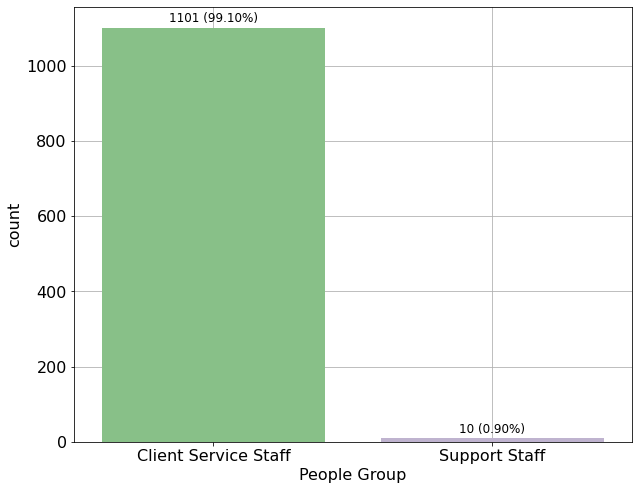

In [93]:
plt.figure(figsize=(10,8))
ax = sns.countplot(Final_dataset['People Group'], palette=sns.color_palette("Accent"))
percents = Final_dataset['People Group'].value_counts(normalize = True)*100
ax = annotateVPlots(ax, percents, clearance=15, ticksize=16, annotsize=12)
adjustVPlot(ax)

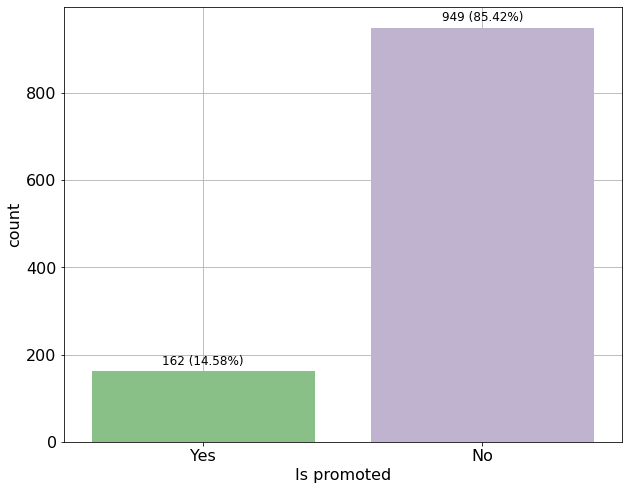

In [94]:
plt.figure(figsize=(10,8))
ax = sns.countplot(Final_dataset['Is promoted'], palette=sns.color_palette("Accent"))
percents = Final_dataset['Is promoted'].value_counts(normalize = True)*100
ax = annotateVPlots(ax, percents, clearance=15, ticksize=16, annotsize=12)
adjustVPlot(ax)

<AxesSubplot:xlabel='Profit Center', ylabel='count'>

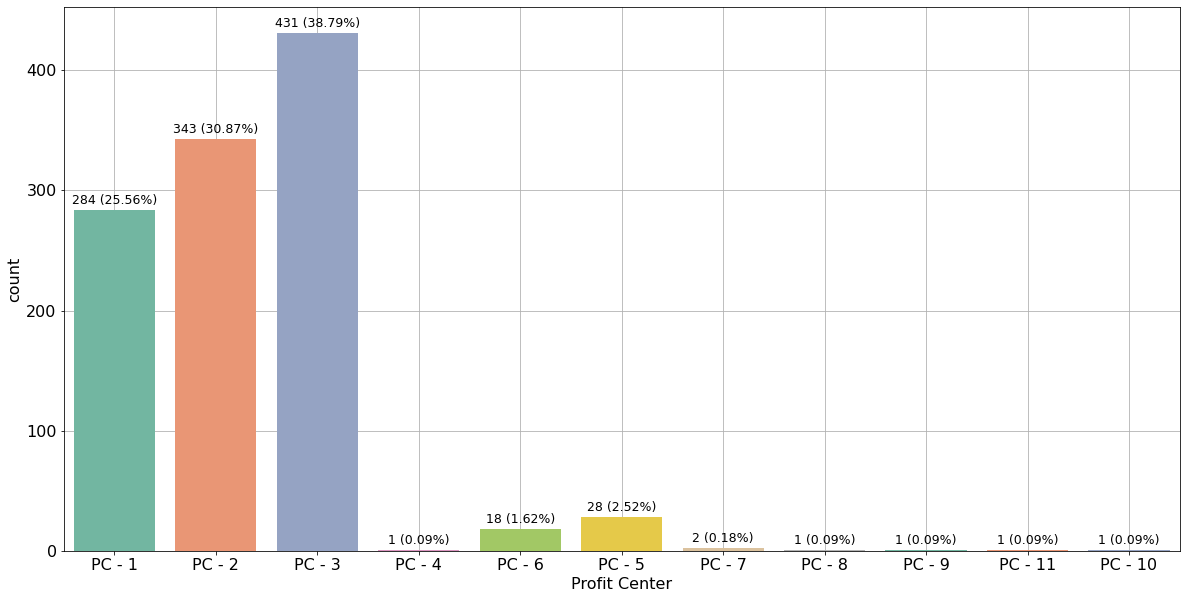

In [95]:
plt.figure(figsize=(20,10))
ax = sns.countplot(Final_dataset['Profit Center'], palette=sns.color_palette("Set2"))
prs = Final_dataset['Profit Center'].value_counts(normalize = True)*100
annotateVPlots(ax, prs, clearance=5, ticksize=16, annotsize=12.5)

<AxesSubplot:xlabel='Employee Location', ylabel='count'>

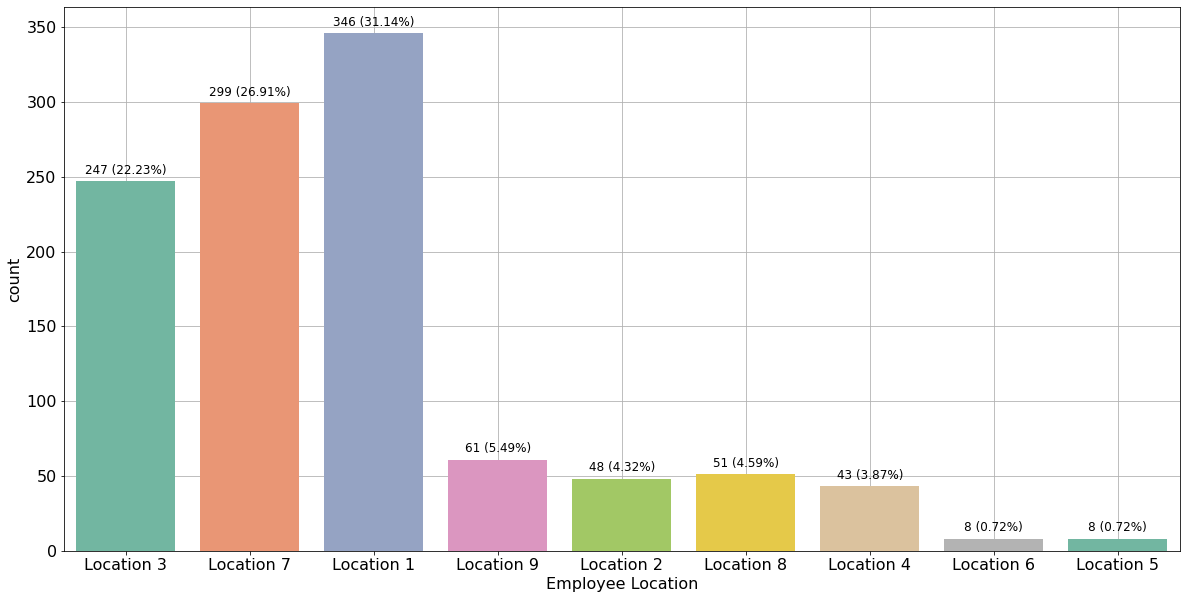

In [96]:
plt.figure(figsize=(20,10))
ax = sns.countplot(Final_dataset['Employee Location'], palette = sns.color_palette("Set2"))
prs = Final_dataset['Employee Location'].value_counts(normalize = True)*100
annotateVPlots(ax, prs, clearance=5, ticksize=16, annotsize=12)

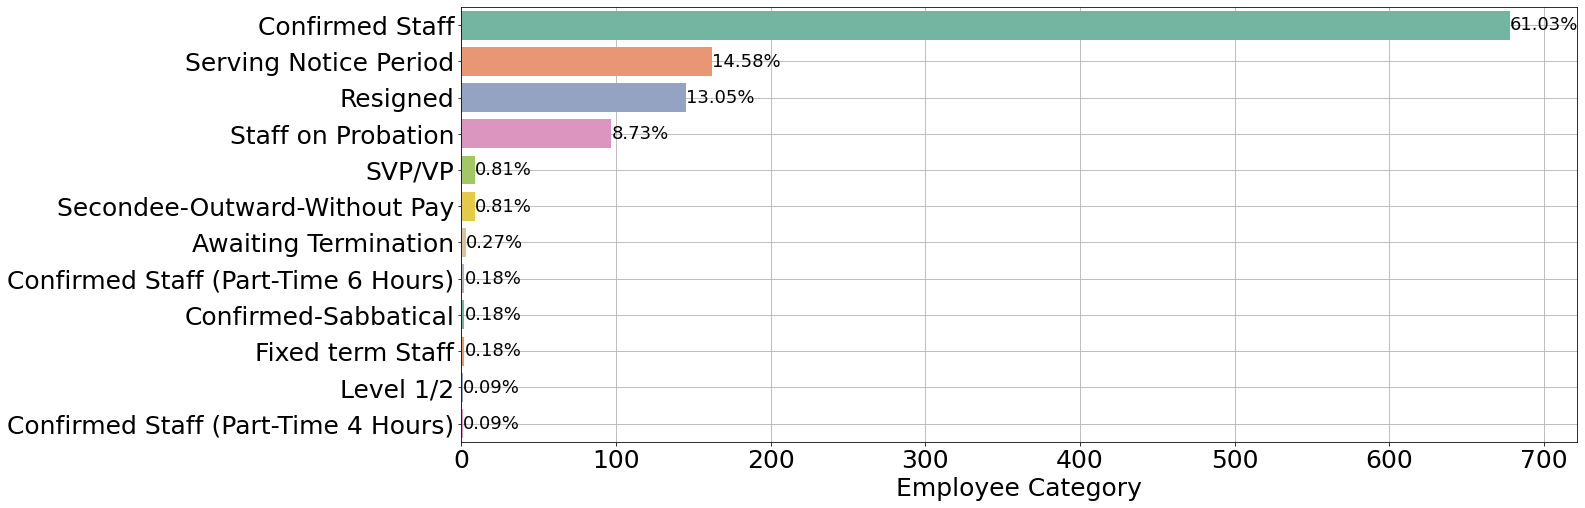

In [97]:
plt.figure(figsize=(20,8))
norm_count = Final_dataset['Employee Category'].value_counts(normalize = True)
norm_count2 = Final_dataset['Employee Category'].value_counts(normalize = False)
ax = sns.barplot(norm_count2, norm_count2.index , order = norm_count2.index, palette = sns.color_palette("Set2"))
annotateHPlots(ax, norm_count, clearance=0.005, ticksize=25, annotsize=18)
adjustHPlot(ax)

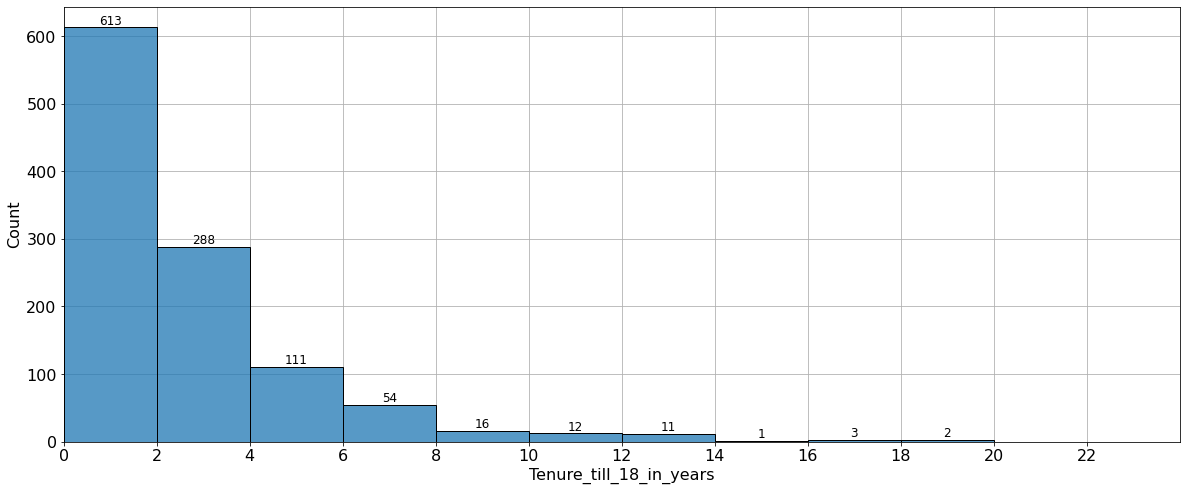

In [98]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Final_dataset['Tenure_till_18_in_years'], binwidth=2)
plt.xlim(0,24)
plt.xticks(range(0,24,2))
annotateVPlots(ax)
plt.show()

<AxesSubplot:xlabel='Utilization%', ylabel='Density'>

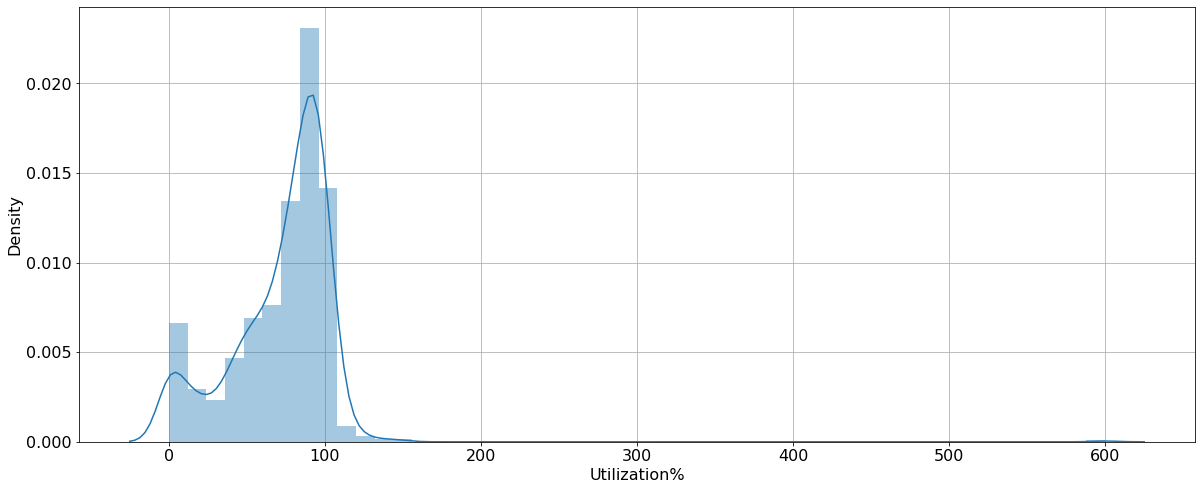

In [99]:
plt.figure(figsize=(20,8))
ax = sns.distplot(Final_dataset['Utilization%'])
annotateVPlots(ax)

<AxesSubplot:xlabel='Utilization%', ylabel='Density'>

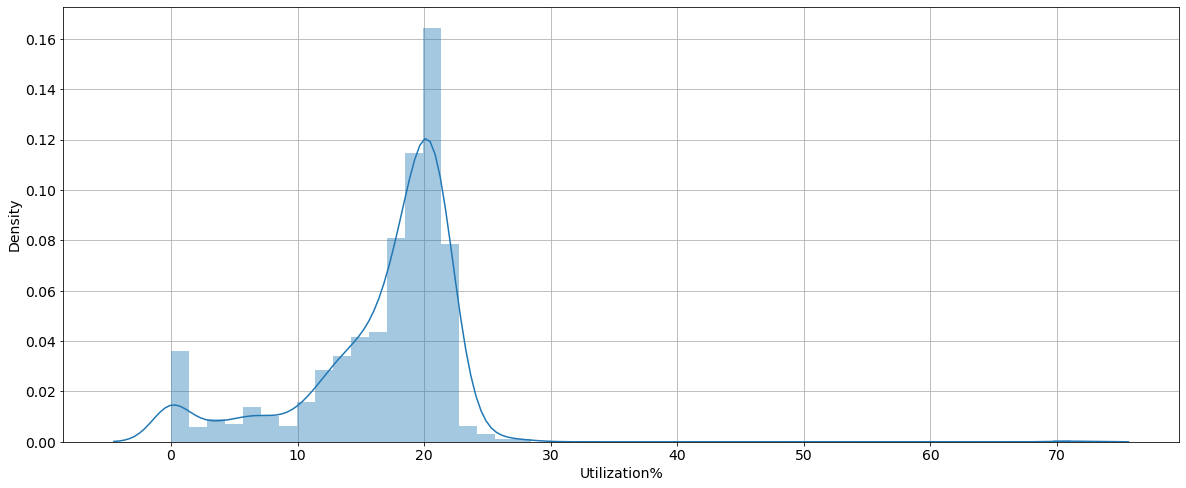

In [100]:
plt.figure(figsize=(20,8))
ax = sns.distplot(Final_dataset['Utilization%'].transform(lambda x: x**(1/1.5)))
annotateVPlots(ax, ticksize=14)

<AxesSubplot:xlabel='Utilization%'>

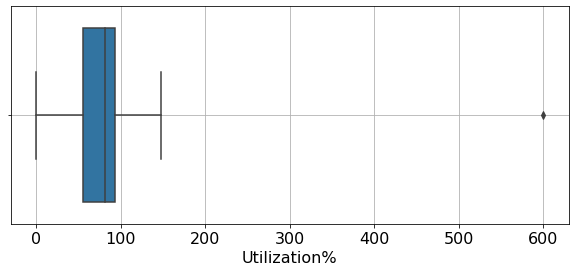

In [101]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(Final_dataset['Utilization%'])
annotateHPlots(ax)

In [102]:
Final_dataset["Current Status16_18"].value_counts()

Active      829
Resigned    282
Name: Current Status16_18, dtype: int64

In [103]:
Final_dataset[(Final_dataset["Utilization%"]==0) & (Final_dataset["Current Status16_18"]=="Resigned")].shape

(17, 26)

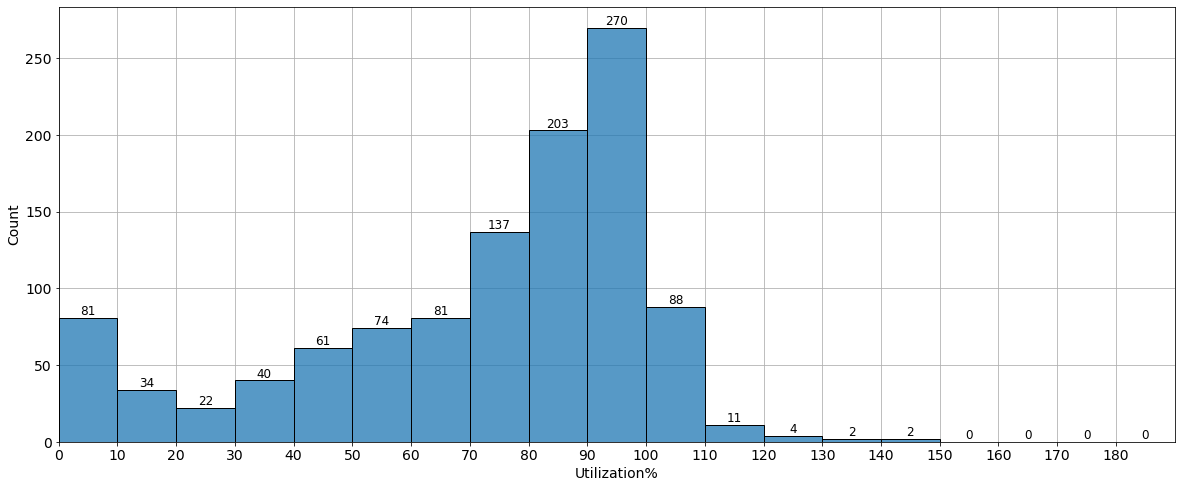

In [104]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Final_dataset['Utilization%'], binwidth=10)
plt.xlim(0,190)
plt.xticks(range(0,190,10))
annotateVPlots(ax, clearance=2, ticksize=14, annotsize=12)
adjustVPlot(ax)
plt.show()

### [Utilization Status](#index)

In [105]:
# Creating a new column based on Utilization

def conditions_2(Final_dataset):
    if (Final_dataset['Utilization%'] >= 0 and Final_dataset['Utilization%'] <= 25):
        return 'Low'
    elif (Final_dataset['Utilization%'] > 25 and Final_dataset['Utilization%'] <= 50):
        return 'Below Avg'
    elif (Final_dataset['Utilization%'] > 50 and Final_dataset['Utilization%'] <= 75):
        return 'Above Avg'
    elif (Final_dataset['Utilization%'] > 75 and Final_dataset['Utilization%'] <= 100):
        return 'Efficient'
    elif (Final_dataset['Utilization%'] > 100):
        return 'Over Utilization'
   

    
Final_dataset['Utilization Status'] = Final_dataset.apply(conditions_2, axis =1)

In [106]:
Final_dataset["Utilization%"].isnull().sum()

0

In [107]:
Final_dataset["Utilization%"].describe()

count    1111.000000
mean       71.954932
std        33.961676
min         0.000000
25%        55.588700
50%        81.395349
75%        93.720940
max       600.000000
Name: Utilization%, dtype: float64

In [108]:
test = pd.cut(Final_dataset["Utilization%"], 
              bins = [0, 25, 50, 75, 100, float("inf")],
              labels = ['Low','Below Avg','Above Avg','Efficient','Over Utilization'],
              include_lowest = True)
sum(test == Final_dataset["Utilization Status"]) == len(Final_dataset)

True

In [109]:
sum(test == Final_dataset["Utilization Status"]), len(Final_dataset)

(1111, 1111)

In [110]:
Final_dataset["Utilization Status"].value_counts()

Efficient           558
Above Avg           220
Low                 129
Below Avg           110
Over Utilization     94
Name: Utilization Status, dtype: int64

<AxesSubplot:xlabel='Utilization Status', ylabel='count'>

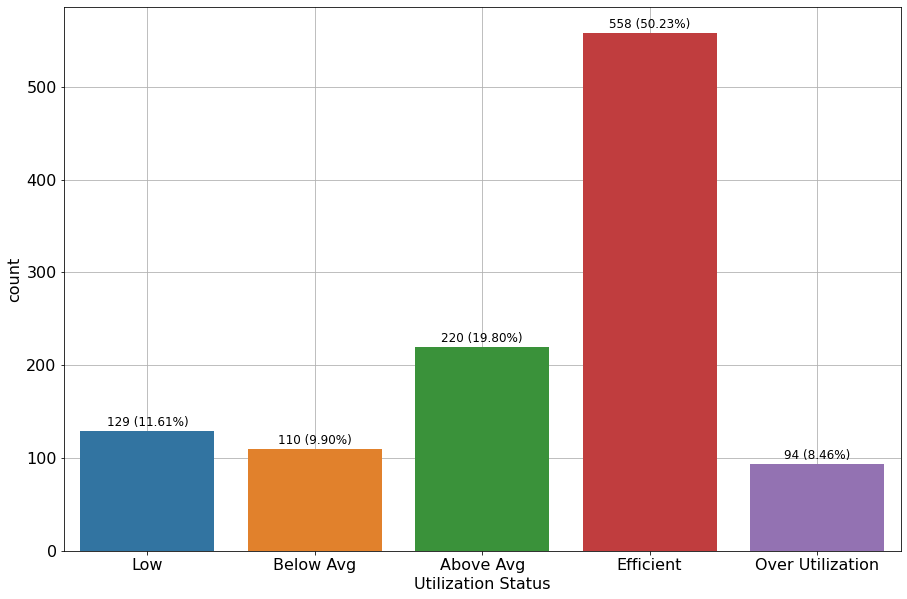

In [111]:
x = ['Low','Below Avg','Above Avg','Efficient','Over Utilization' ]

plt.figure(figsize=(15,10))
ax = sns.countplot(Final_dataset['Utilization Status'], order = x)
prs = Final_dataset['Utilization Status'].value_counts(normalize = True)*100
annotateVPlots(ax, prs)

In [112]:
test.value_counts(normalize=1)

Efficient           0.502250
Above Avg           0.198020
Low                 0.116112
Below Avg           0.099010
Over Utilization    0.084608
Name: Utilization%, dtype: float64

In [113]:
# 8% of the employees are below average.
# 29% of the employees are being utilized efficiently.
# 14 % of employees are under Above Avg utilization category
# 5% of employees are under low utilization category and may be at higher risk of leaving considering growth.
# 45% of employees are under over utilization category and may be at higher risk of leaving considering poor work life balance.

In [114]:
Final_dataset['Current Status16_18'].value_counts(normalize=True)

Active      0.746175
Resigned    0.253825
Name: Current Status16_18, dtype: float64

In [115]:
Final_dataset_resigned["Gender"].value_counts()

M          187
F           90
Unknown      5
Name: Gender, dtype: int64

In [117]:
Final_dataset[Final_dataset["Employee Name"].isin(["Rebekkah Brigid"])]

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Utilization Status
52,53,Rebekkah Brigid,M,Career Growth,Unknown,3.0,PC - 1,Location 3,Client Service Staff,Serving Notice Period,Em Cacilie,12,6.587404,79.048851,6.59,31.0,Resigned,No,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [118]:
Final_dataset["Gender"].value_counts()

Unknown    814
M          201
F           96
Name: Gender, dtype: int64

In [119]:
Final_dataset_resigned["Gender"].value_counts()

M          187
F           90
Unknown      5
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

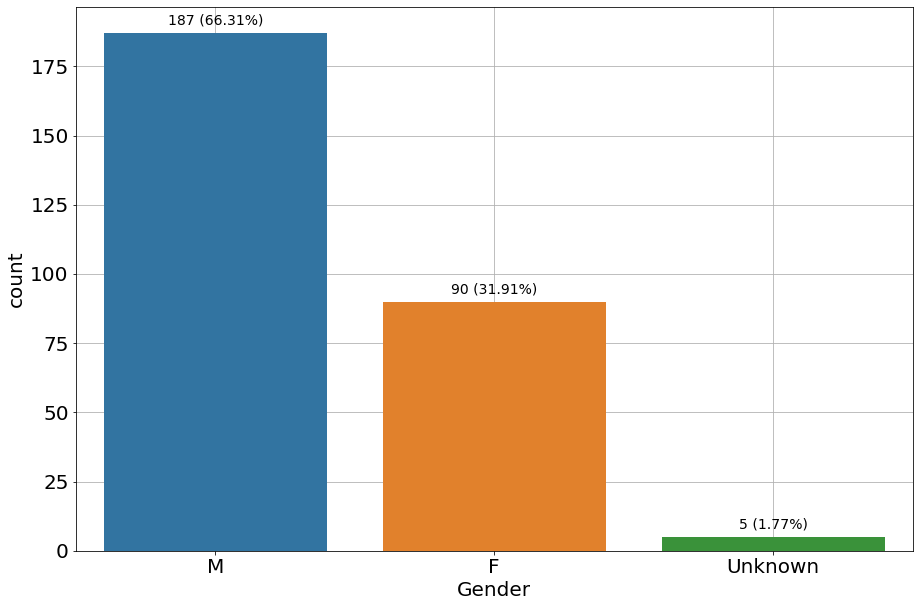

In [120]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data = Final_dataset_resigned,x ='Gender')
percentages = Final_dataset_resigned['Gender'].value_counts(normalize = True)*100
annotateVPlots(ax, percentages, 3, ticksize=20, annotsize=14)

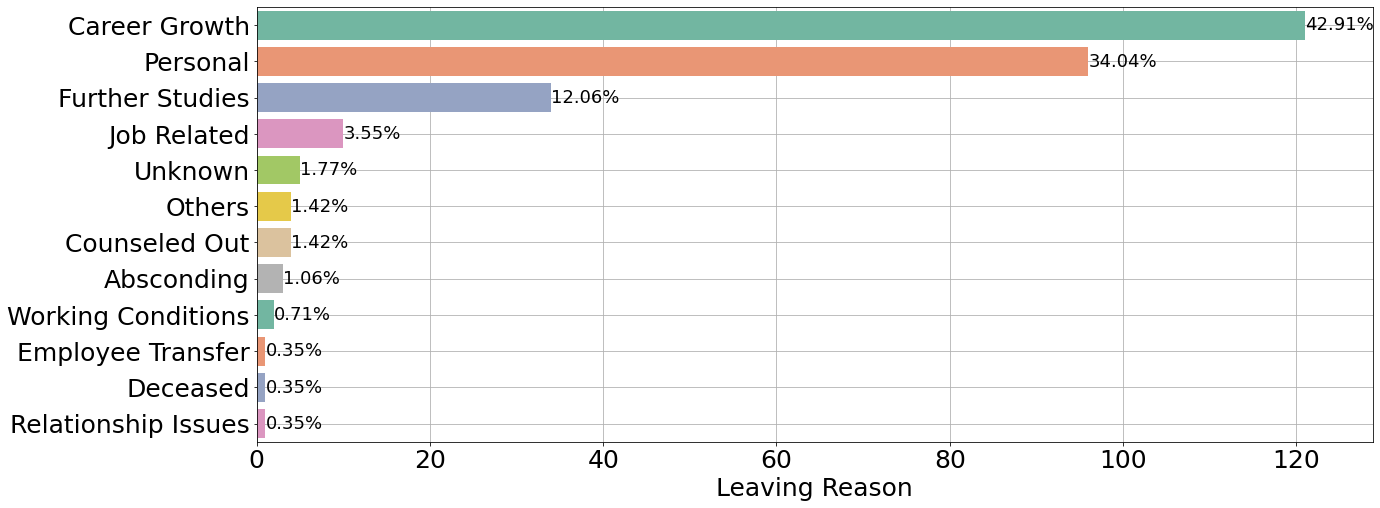

In [121]:
plt.figure(figsize=(20,8))
norm_count = Final_dataset_resigned['Leaving Reason'].value_counts(normalize = True)
norm_count2 = Final_dataset_resigned['Leaving Reason'].value_counts(normalize = False)
ax = sns.barplot(norm_count2, norm_count2.index , order = norm_count2.index, palette = sns.color_palette("Set2"))
annotateHPlots(ax, norm_count, clearance=0.004, ticksize=25, annotsize=18)
adjustHPlot(ax)

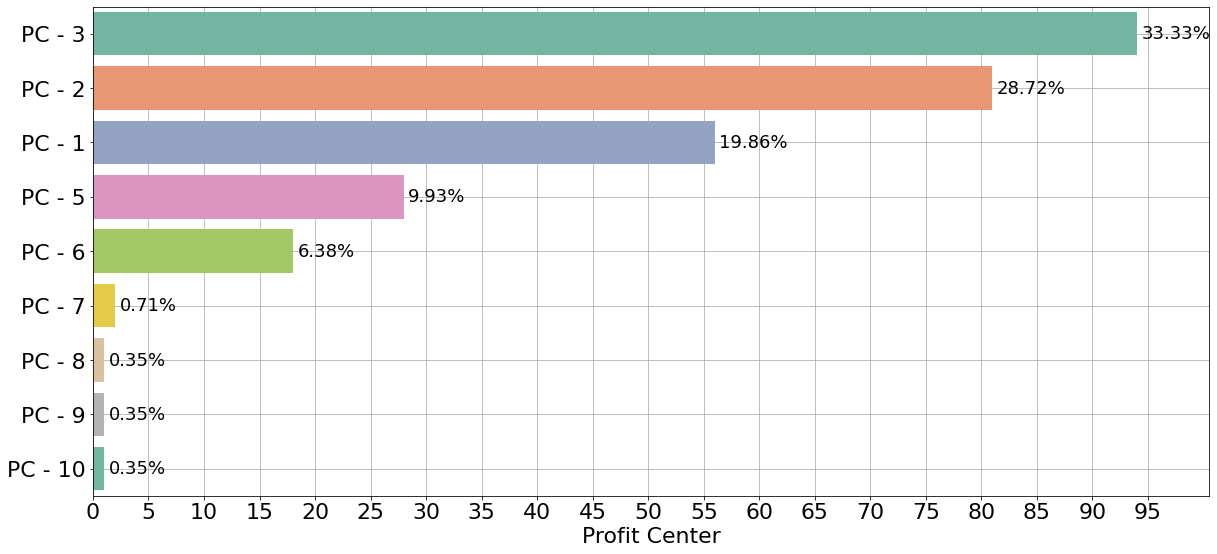

In [123]:
plt.figure(figsize=(20,9))
plt.xticks(range(0,100,5))
norm_count = Final_dataset_resigned['Profit Center'].value_counts(normalize = True)
norm_count2 = Final_dataset_resigned['Profit Center'].value_counts(normalize = False)
ax = sns.barplot(norm_count2, norm_count2.index , order = norm_count2.index, palette = sns.color_palette("Set2"))
annotateHPlots(ax, norm_count, clearance=0.4, ticksize=22, annotsize=18)
adjustHPlot(ax)

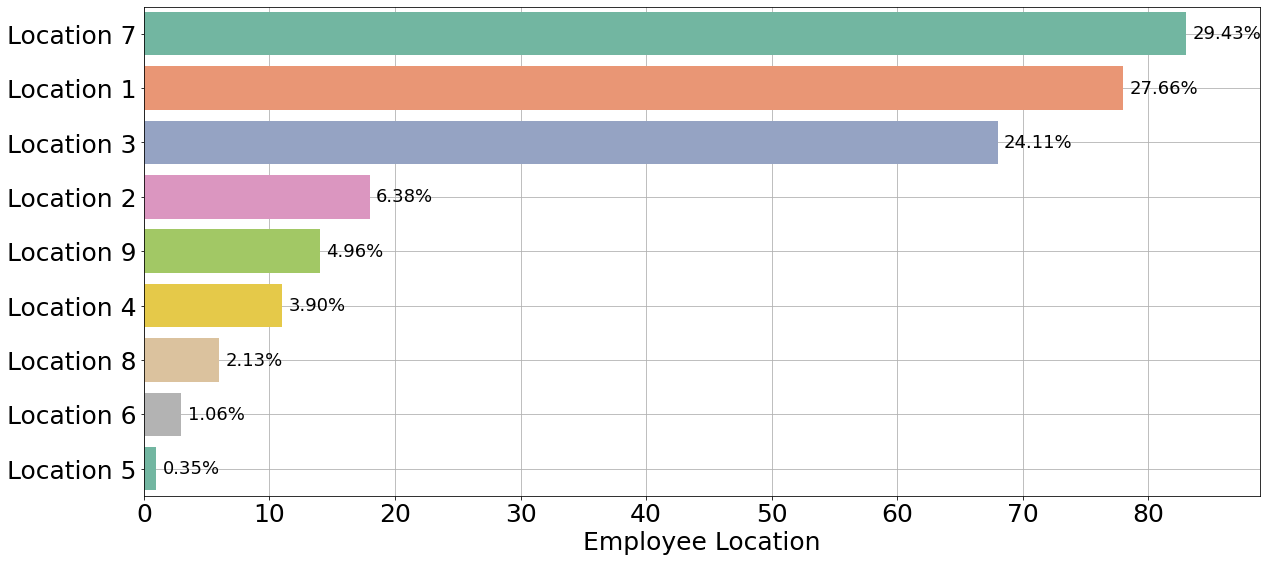

In [124]:
plt.figure(figsize=(20,9))
norm_count = Final_dataset_resigned['Employee Location'].value_counts(normalize = True)
norm_count2 = Final_dataset_resigned['Employee Location'].value_counts(normalize = False)
ax = sns.barplot(norm_count2, norm_count2.index , order = norm_count2.index, palette = sns.color_palette("Set2"))
annotateHPlots(ax, norm_count, clearance=0.5, ticksize=25, annotsize=18)
adjustHPlot(ax)

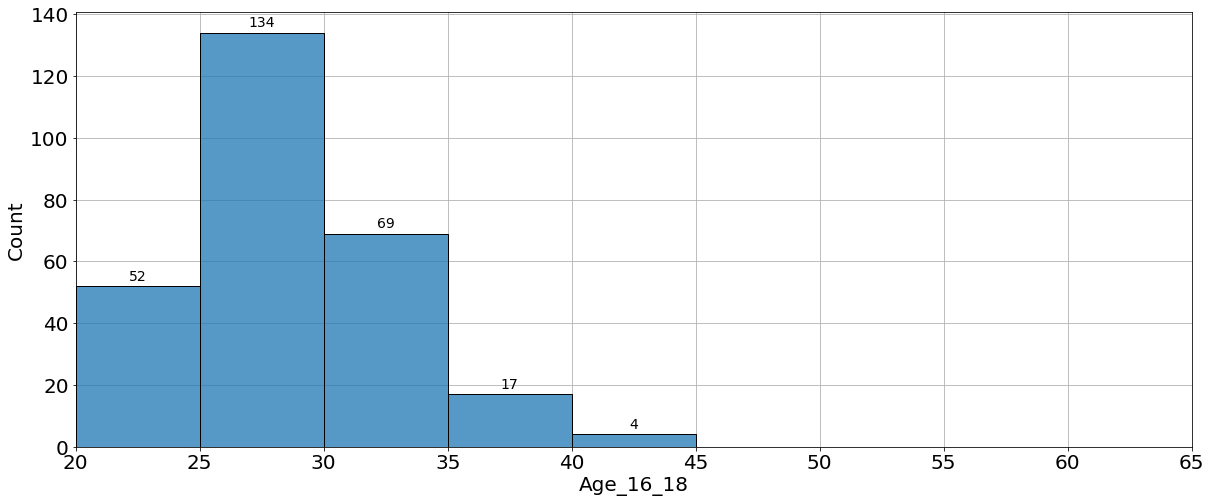

In [125]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Final_dataset_resigned['Age_16_18'], binwidth=5)
plt.xlim(20,45)
plt.xticks(range(20,66,5))
annotateVPlots(ax, clearance=2, ticksize=20, annotsize=14)
adjustVPlot(ax)
plt.show()

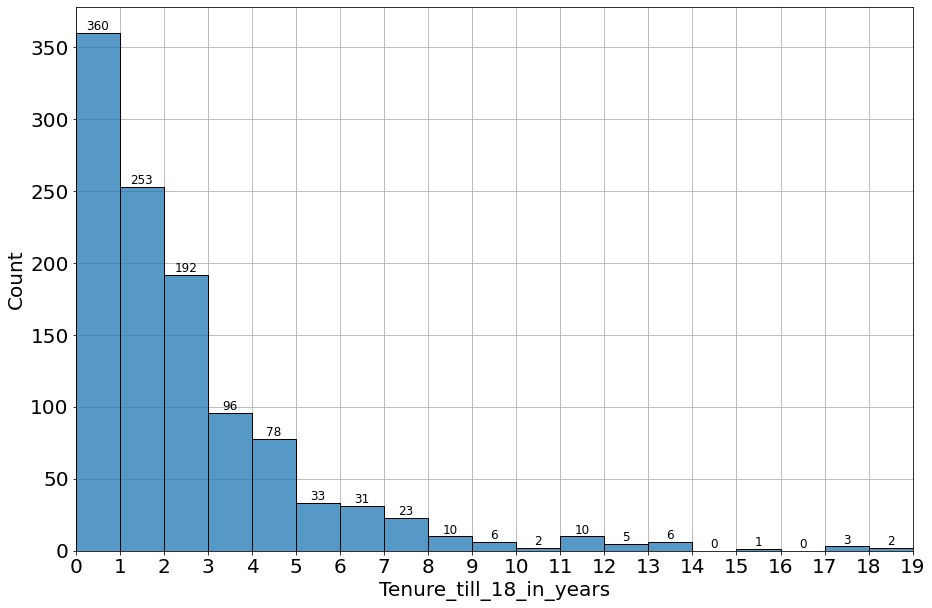

In [137]:
plt.figure(figsize=(15,10))
ax = sns.histplot(Final_dataset['Tenure_till_18_in_years'], binwidth=1)
plt.xlim(0,19)
plt.xticks(range(0,20,1))
# plt.xlim(0,240)
# plt.xticks(range(0,240,12))
annotateVPlots(ax, clearance=2, ticksize=20, annotsize=12)
adjustVPlot(ax)
plt.show()

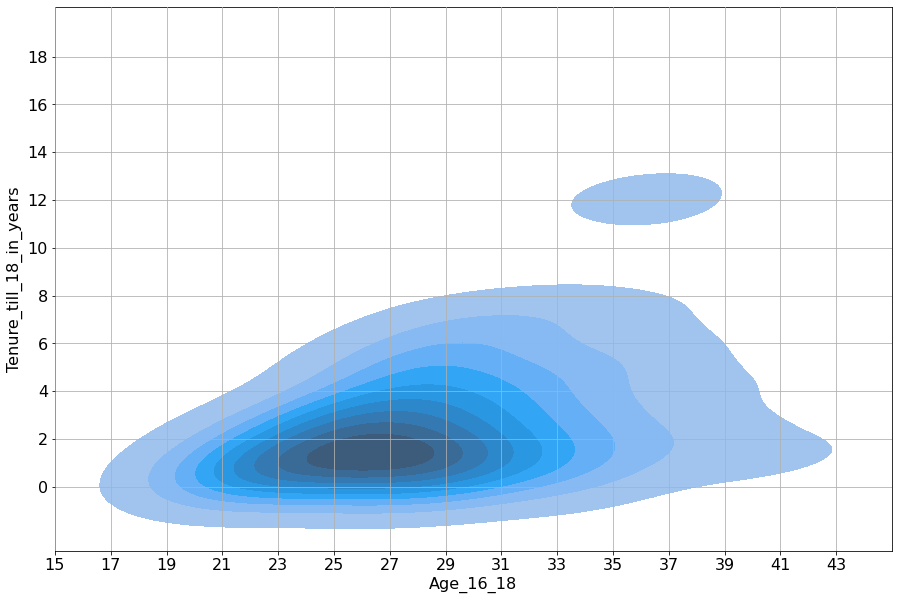

In [161]:
plt.figure(figsize=(15,10))
ax = sns.kdeplot(Final_dataset_resigned["Age_16_18"], Final_dataset_resigned["Tenure_till_18_in_years"], shade = True)
plt.xlim((20, 45))
plt.xticks(range(15, 45, 2))
plt.yticks(range(0, 20, 2))
annotateVPlots(ax)
ax.set_axisbelow(False)

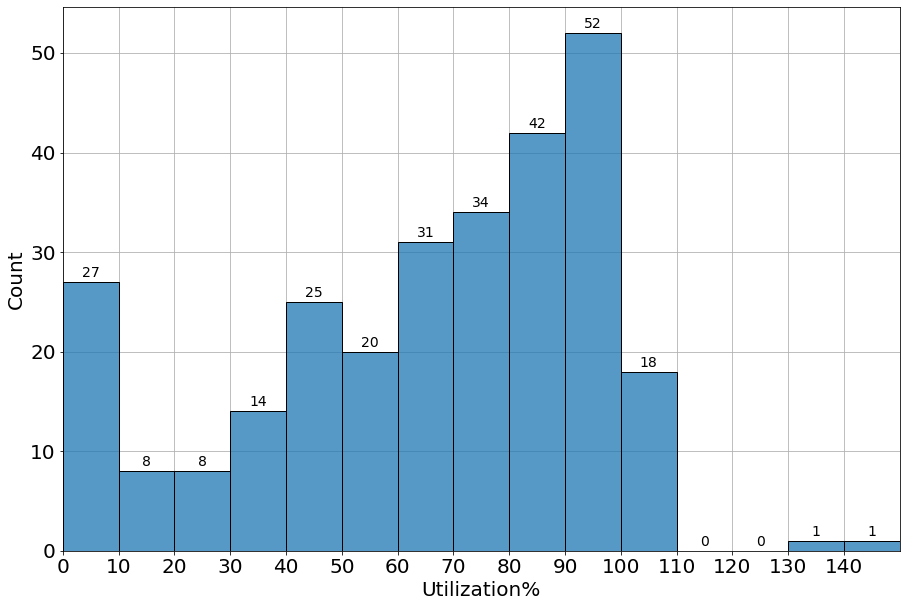

In [115]:
plt.figure(figsize=(15,10))
ax = sns.histplot(Final_dataset_resigned['Utilization%'], binwidth=10)
plt.xlim(0,150)
plt.xticks(range(0,150,10))
annotateVPlots(ax, clearance=0.5, ticksize=20, annotsize=14)
adjustVPlot(ax)
plt.show()

In [118]:
ax.get_xticklabels()

[Text(0, 0, '0'),
 Text(10, 0, '10'),
 Text(20, 0, '20'),
 Text(30, 0, '30'),
 Text(40, 0, '40'),
 Text(50, 0, '50'),
 Text(60, 0, '60'),
 Text(70, 0, '70'),
 Text(80, 0, '80'),
 Text(90, 0, '90'),
 Text(100, 0, '100'),
 Text(110, 0, '110'),
 Text(120, 0, '120'),
 Text(130, 0, '130'),
 Text(140, 0, '140')]

In [126]:
Staff_utilization_2016_2018[Staff_utilization_2016_2018["Employee Name"].isin(["Carolynn Alicia", "Philippe Kizzie"])]

,Employee No,Profit Center16_17,Employee Name,Employee Position16_17,Employee Location16_17,People Group16_17,Employee Category16_17,Supervisor name16_17,Join Date16_17,Current Status16_17,Month Year Termination Date16_17,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,16_17 Total Hours,16_17 Total Available Hours,16_17 Work Hours,16_17 Leave Hours,16_17 Training Hours,16_17 BD Hours,16_17 NC Hours,16_17 Utilization%,Profit Center17_18,Employee Position17_18,Employee Location17_18,People Group17_18,Employee Category17_18,Supervisor name17_18,Join Date17_18,Current Status17_18,Month Year Termination Date17_18,Apr 2017 Total Hours,Apr 2017 Total Available Hours,Apr 2017 Work Hours,Apr 2017 Leave Hours,Apr 2017 Training Hours,Apr 2017 BD Hours,Apr 2017 NC Hours,Apr 2017 Utilization%,May 2017 Total Hours,May 2017 Total Available Hours,May 2017 Work Hours,May 2017 Leave Hours,May 2017 Training Hours,May 2017 BD Hours,May 2017 NC Hours,May 2017 Utilization%,Jun 2017 Total Hours,Jun 2017 Total Available Hours,Jun 2017 Work Hours,Jun 2017 Leave Hours,Jun 2017 Training Hours,Jun 2017 BD Hours,Jun 2017 NC Hours,Jun 2017 Utilization%,Jul 2017 Total Hours,Jul 2017 Total Available Hours,Jul 2017 Work Hours,Jul 2017 Leave Hours,Jul 2017 Training Hours,Jul 2017 BD Hours,Jul 2017 NC Hours,Jul 2017 Utilization%,Aug 2017 Total Hours,Aug 2017 Total Available Hours,Aug 2017 Work Hours,Aug 2017 Leave Hours,Aug 2017 Training Hours,Aug 2017 BD Hours,Aug 2017 NC Hours,Aug 2017 Utilization%,Sep 2017 Total Hours,Sep 2017 Total Available Hours,Sep 2017 Work Hours,Sep 2017 Leave Hours,Sep 2017 Training Hours,Sep 2017 BD Hours,Sep 2017 NC Hours,Sep 2017 Utilization%,Oct 2017 Total Hours,Oct 2017 Total Available Hours,Oct 2017 Work Hours,Oct 2017 Leave Hours,Oct 2017 Training Hours,Oct 2017 BD Hours,Oct 2017 NC Hours,Oct 2017 Utilization%,Nov 2017 Total Hours,Nov 2017 Total Available Hours,Nov 2017 Work Hours,Nov 2017 Leave Hours,Nov 2017 Train

In [127]:
df.columns

Index(['Employee No', 'Employee Name', 'Gender', 'Leaving Reason',
       'Previous Employer', 'Latest  Available Rating', 'Profit Center',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Month of termination', 'Tenure_till_18',
       'Tenure_till_18_in_months', 'Tenure_till_18_in_years', 'Age_16_18',
       'Current Status16_18', 'Is promoted', 'Total Hours',
       'Total Available Hours', 'Work Hours', 'Leave Hours', 'Training Hours',
       'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

In [128]:
Final_dataset.to_csv("Final_dataset.csv", index=False)

In [129]:
Final_dataset.head()

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Utilization Status
0,1,Rochette Jilleen,Unknown,Unknown,Unknown,Unknown,PC - 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,Unknown,17.497964,209.975564,17.0,0.0,Active,Yes,4168.0,3666.5,1084.0,404.0,97.5,2623.5,74.0,29.661004,Below Avg
1,2,Daryl Natalina,Unknown,Unknown,Unknown,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Unknown,18.834062,226.008748,19.0,0.0,Active,No,4168.0,3750.0,1277.5,364.0,54.0,1294.5,1330.5,34.083718,Below Avg
2,3,Annnora Gabrielle,Unknown,Unknown,Unknown,Unknown,PC - 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,Unknown,17.161201,205.934413,17.0,0.0,Active,No,4168.0,3618.5,2177.5,482.0,67.5,970.5,907.0,60.553933,Above Avg
3,4,Barbee Joey,M,Career Growth,kadoo,Unknown,PC - 3,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2,17.413089,208.957063,17.0,43.0,Resigned,No,3928.0,3491.5,546.0,404.0,32.5,2743.0,279.0,15.695026,Low
4,5,Idalina Lauraine,Unknown,Unknown,Unknown,Unknown,PC - 4,Location 3,Client Service Staff,Level 1/2,Abagail Druci,Unknown,18.751925,225.023101,19.0,0.0,Active,No,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,12.365145,Low


In [130]:
Final_dataset["BD Hours"].clip(lower=0, )

0       2623.5
1       1294.5
2        970.5
3       2743.0
4       1159.0
5       2657.0
6       2507.0
7       1264.0
8       2465.5
9       2522.0
10         0.0
11       859.0
12      2279.0
13      2051.0
14         0.0
15      2555.0
16         0.0
17       551.0
18        20.0
19         0.0
20      2187.0
21         0.0
22      2292.0
23       896.0
24       730.0
25         4.0
26         8.0
27       610.0
28        94.0
29       910.0
30       322.0
31         0.0
32         6.0
33         0.0
34         0.0
35         0.0
36       136.0
37        20.0
38         0.0
39         0.0
40         0.0
41         0.0
42       326.0
43      2551.0
44         0.0
45         0.0
46       401.0
47      1396.5
48         0.0
49       120.0
50         0.0
51         0.0
52         0.0
53       472.0
54         0.0
55         0.0
56         0.0
57       715.0
58         0.0
59         0.0
60       914.5
61         0.0
62         0.0
63         0.0
64         0.0
65         0.0
66        

In [131]:
Final_dataset.describe()

,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,2.523089,30.277062,2.539154,7.018902,2617.209721,2278.719793,1720.710990,291.023852,48.405770,110.225923,577.371719,71.954932
std,2.629695,31.556336,2.648482,12.391024,1473.400484,1301.761644,1212.134818,272.986040,40.618409,444.375525,650.453143,33.961676
min,0.000000,0.000000,0.000000,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,-24.000000,-28.500000,0.000000
25%,0.750187,9.002238,1.000000,0.000000,1352.000000,1167.000000,648.000000,106.000000,16.000000,0.000000,136.000000,55.588700
50%,1.831660,21.979917,2.000000,0.000000,2760.000000,2372.000000,1514.000000,248.000000,39.000000,0.000000,375.500000,81.395349
75%,3.085621,37.027454,3.000000,0.000000,4168.000000,3596.000000,2856.625000,416.000000,72.750000,0.000000,743.500000,93.720940
max,18.834062,226.008748,19.000000,43.000000,4168.000000,4168.000000,4716.000000,2824.000000,249.500000,3891.000000,4715.500000,600.000000


In [132]:
Final_dataset[Final_dataset["BD Hours"] < 0]

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Utilization Status
414,415,Lu Arabel,Unknown,Unknown,Unknown,Unknown,PC - 2,Location 7,Client Service Staff,Confirmed Staff,Jillian Lorelei,Unknown,2.751597,33.019159,3.0,0.0,Active,No,4168.0,3480.5,2752.5,620.0,67.5,-24.0,880.0,79.575117,Efficient


In [133]:
Final_dataset[Final_dataset["NC Hours"] < 0]

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Utilization Status
321,322,Trula Roxana,Unknown,Unknown,Unknown,Unknown,PC - 3,Location 1,Client Service Staff,Confirmed Staff,Tiena Hatti,Unknown,3.085621,37.027454,3.0,0.0,Active,Yes,4168.0,3616.0,3709.0,516.0,36.0,8.0,-28.5,102.565635,Over Utilization


In [134]:
Final_dataset[Final_dataset["Total Available Hours"] < 0]

,Employee No,Employee Name,Gender,Leaving Reason,Previous Employer,Latest Available Rating,Profit Center,Employee Location,People Group,Employee Category,Supervisor name,Month of termination,Tenure_till_18,Tenure_till_18_in_months,Tenure_till_18_in_years,Age_16_18,Current Status16_18,Is promoted,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Utilization Status
1106,1103,Brock Walsh,Unknown,Unknown,Unknown,Unknown,PC - 1,Location 3,Client Service Staff,Staff on Probation,Gavra Kayle,Unknown,0.0,0.0,0.0,0.0,Active,No,80.0,-40.0,0.0,0.0,120.0,0.0,0.0,0.0,Low


In [135]:
"""
Dropping employee numbers 415, 322, 1103
"""
drop_rows = [
    414
    , 321
    , 1106
]
Final_dataset.drop(drop_rows, axis=0, inplace=True)

### [Feature Selection](#index)

In [136]:
from scipy.stats import chi2_contingency

In [137]:
def BVA_cat_cat(data, tar, cat):
    table = pd.crosstab(data[tar],data[cat])
    
    chi, p, dof, expected = chi2_contingency(table)
    if p<0.05:
        sig = True
    else:
        sig = False

    return [cat, p, sig]

In [138]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

def Bivariate_cont_cat(data, cont, cat, category):
    #creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]

    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
#     z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
#     table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
    return [cont, f"{t_p_val:.5f}", t_p_val < 0.05]

In [139]:
Final_dataset['Employee Category'] = Final_dataset['Employee Category'].apply(lambda s: "Awaiting Termination" if s=="Resigned" else s)

In [140]:
Final_dataset['Employee Category'].value_counts()

Confirmed Staff                        676
Serving Notice Period                  162
Awaiting Termination                   148
Staff on Probation                      96
SVP/VP                                   9
Secondee-Outward-Without Pay             9
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed-Sabbatical                     2
Fixed term Staff                         2
Level 1/2                                1
Confirmed Staff (Part-Time 4 Hours)      1
Name: Employee Category, dtype: int64

In [141]:
import re

In [142]:
categorical = [
    'Is promoted',
    'Employee Category',
    'Employee Location',
    'People Group',
    'Profit Center'
]

In [143]:
pvals = []
for cat in categorical:
    result = BVA_cat_cat(Final_dataset, "Current Status16_18", cat)
    pvals.append(result)
pd.DataFrame(pvals, columns=["ColumnName", "P-value", "IsSignificant"])

,ColumnName,P-value,IsSignificant
0,Is promoted,2.345580e-15,True
1,Employee Category,1.708864e-196,True
2,Employee Location,1.043203e-01,False
3,People Group,4.459472e-01,False
4,Profit Center,7.149553e-29,True


In [144]:
continuous = [
    "Total Hours",
    "Total Available Hours",
    "Tenure_till_18_in_months",
    "Tenure_till_18",
    'Work Hours',
    'Leave Hours',
    'Training Hours',
    'NC Hours',
    'Utilization%'
]

In [145]:
pvals = []
for cont in continuous:
    result = Bivariate_cont_cat(Final_dataset, cont, "Current Status16_18", "Resigned")
    pvals.append(result)
pd.DataFrame(pvals, columns=["ColumnName", "P-value", "IsSignificant"])

,ColumnName,P-value,IsSignificant
0,Total Hours,0.00000,True
1,Total Available Hours,0.00000,True
2,Tenure_till_18_in_months,0.43315,False
3,Tenure_till_18,0.43315,False
4,Work Hours,0.00000,True
5,Leave Hours,0.00000,True
6,Training Hours,0.00000,True
7,NC Hours,0.00000,True
8,Utilization%,0.01641,True


In [146]:
Final_dataset["Utilization%-Mean"] = Final_dataset["Utilization%"]
Final_dataset.loc[Final_dataset["Utilization%"]==0, "Utilization%-Mean"] = 96

In [147]:
hour_columns = [
    'Total Hours',
    'Total Available Hours',
    'Work Hours',
    'Leave Hours',
    'Training Hours',
    'BD Hours',
    'NC Hours'
]

In [148]:
maxlen = max(hour_columns, key=len)
for col in hour_columns:
    pvalue = Bivariate_cont_cat(Final_dataset, col, "Current Status16_18", "Resigned")
    print(f"{col:<{len(maxlen)}}: {pvalue[1]}")

Total Hours          : 0.00000
Total Available Hours: 0.00000
Work Hours           : 0.00000
Leave Hours          : 0.00000
Training Hours       : 0.00000
BD Hours             : 0.00049
NC Hours             : 0.00000


## [Normality Check](#index)

In [149]:
from statsmodels.api import qqplot

In [150]:
def check_normality(data, column_name):
    
    if any(data[column_name]==0):
        add = 1
    
    plt.show(qqplot(data[column_name]))
    plt.show(sns.distplot(data[column_name]))
    print("----------------------------------------------------------------")
    plt.show(qqplot(np.log(data[column_name] + add)))
    plt.show(sns.distplot(np.log(data[column_name] + add)))

In [151]:
Final_dataset["Utilization%-Mean"].clip(upper=200, inplace=True)

Total Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


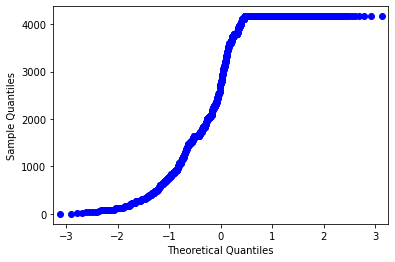

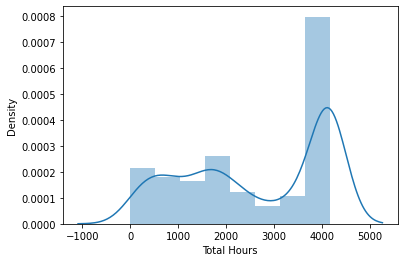

----------------------------------------------------------------


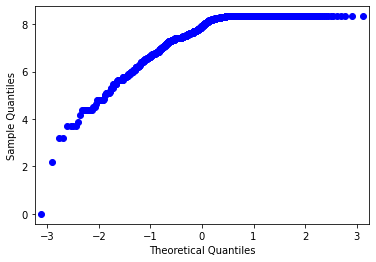

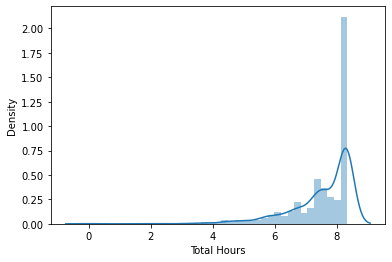

Total Available Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


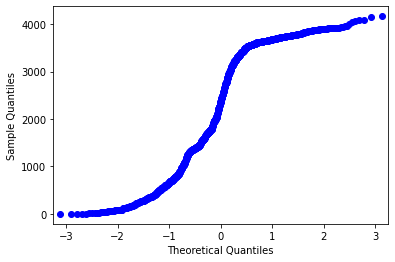

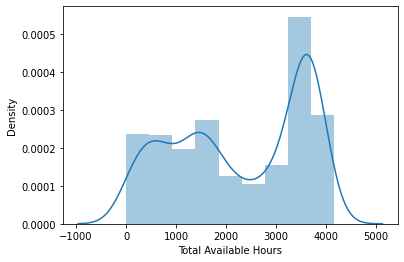

----------------------------------------------------------------


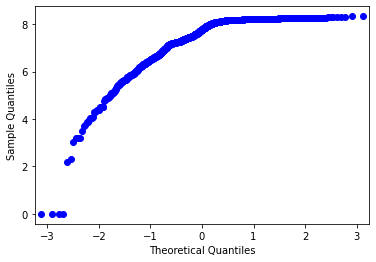

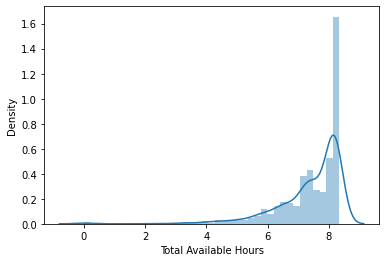

Work Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


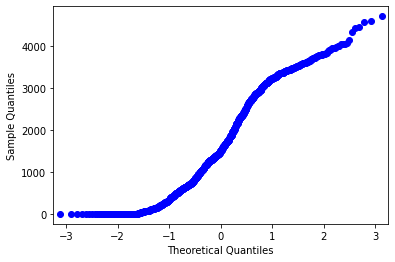

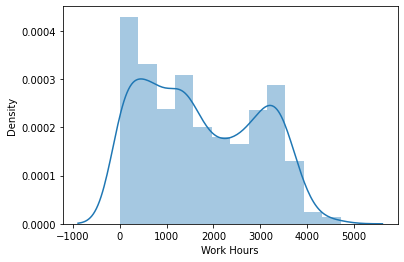

----------------------------------------------------------------


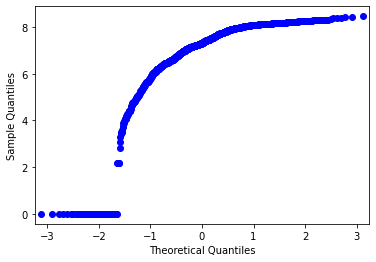

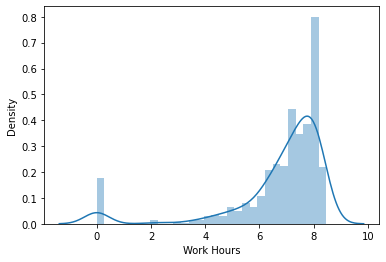

Leave Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


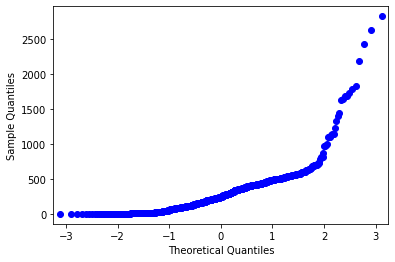

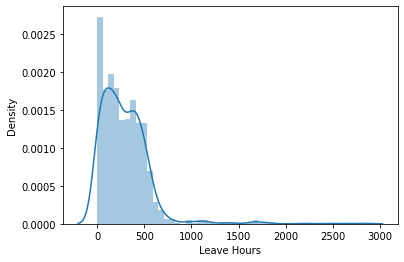

----------------------------------------------------------------


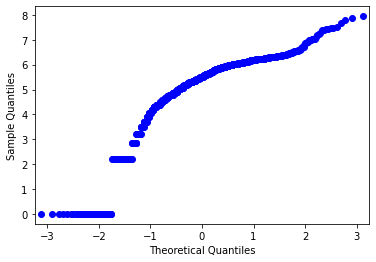

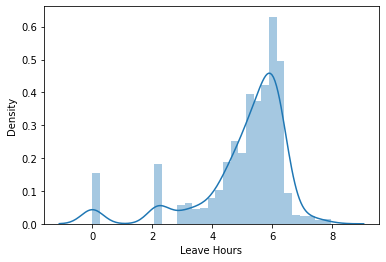

Training Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


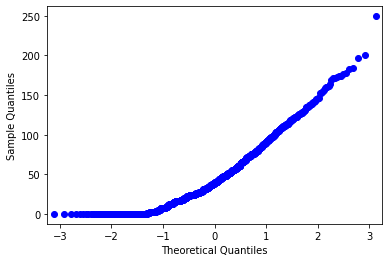

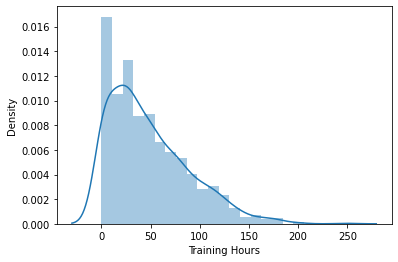

----------------------------------------------------------------


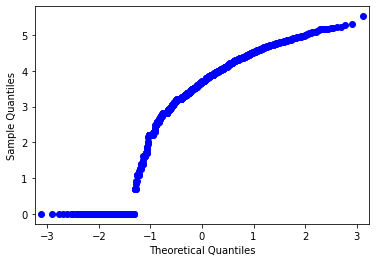

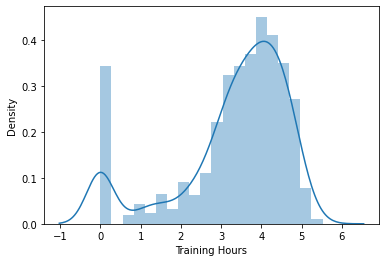

BD Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


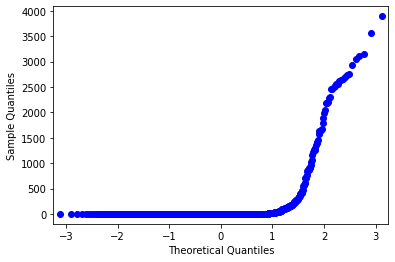

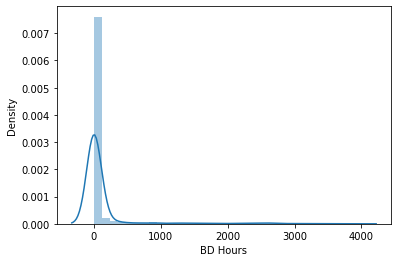

----------------------------------------------------------------


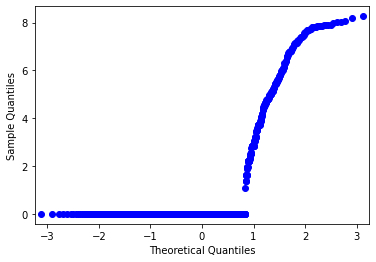

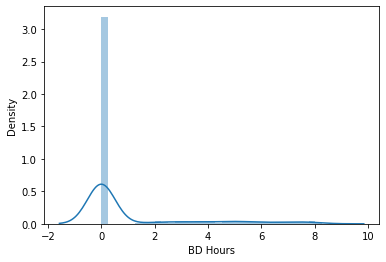

NC Hours ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


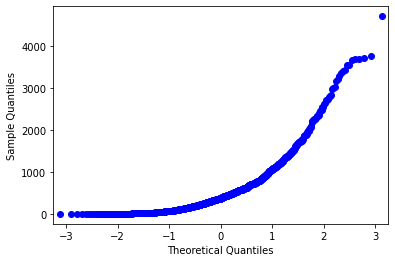

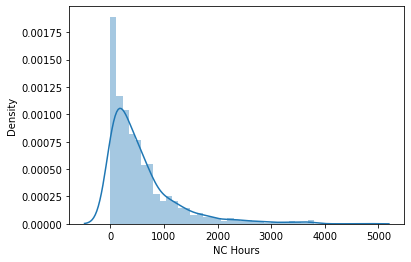

----------------------------------------------------------------


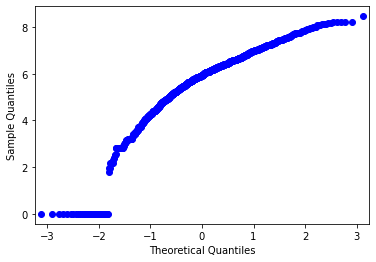

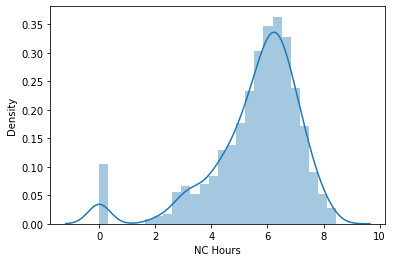

In [152]:
for col in hour_columns:
    print(f"{col} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■")
    check_normality(Final_dataset, col)

In [153]:
Final_dataset.to_csv("Final_for_model.csv", index=False)